# **Loan Default Prediction**

## **Problem Definition**
The bank wants to reduce the number of defaults of its loans to customers by using Data Science to identify potential customer who are most likely to default. Defaults affect the banks profits and need to be avoided as much as possible.

### **The Context:**

 - Why is this problem important to solve?
 This problem needs to be solved in order for the bank to stay in business and keep approving loans to customer whose profile indicicates they will back back the loan, and at the same time limit the number of customers who most likely wont pay back, so that they can profit only on the good customers.

### **The objective:**

 - What is the intended goal?

 The goal is to identify what features from the customer and type of loan they are asking for are most important in determining whether the person is going to pay back the loan or not. We are looking to identify what set of characteristics can help us predict this outcome most of the time.

### **The key questions:**

- What are the key questions that need to be answered?

Who is my ideal customer persona?
What type of loans do they take out?
What type of potential customers should the bank avoid giving loans to?
How is the model predicting its outcome for each customer?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

We are trying to create a model that will correctly pinpoint if a customer will payback a loan or not. Depending on a set of features like amount of loan, credit history, job employment among others. These will help us create a decision tree , so we can make more informed decisions when approving a loan in the future.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import plotly.io as pio
pio.templates.default = 'simple_white'


import warnings
warnings.filterwarnings("ignore")

# Remove the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Set the limit for the number of displayed rows to 20
pd.set_option("display.max_rows", 20)

# Import libraries to build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# Metrics to evaluate the model
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

In [2]:
# @title SHAP installation for shapley values and model interpretation
try:
  import shap
except:
  !pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 2.8 MB/s eta 0:00:00


## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [3]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Read HMEQ dataset from google drive
df=pd.read_csv('/content/drive/MyDrive/MIT Course/Capstone Project/hmeq.csv')

In [5]:
# Copying data to another variable to avoid changes to original data
same_data = df.copy()

In [6]:
#Look at first 5 rows of dataset
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [7]:
#Look at last 5 rows of dataset
df.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [8]:
# Checking the count of unique values in each column
df.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

In [9]:
# Get number of columns and rows of the data
df.shape

(5960, 13)

In [10]:
print(f"The are {df.shape[0]} rows and {df.shape[1]} columns ")

The are 5960 rows and 13 columns 


In [11]:
# See general information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [12]:
# Check for null values count and percentages of null values per column

total = df.shape[0]  # Total number of rows in the DataFrame
null_counts = df.isnull().sum() #Sum of null values
null_percentages = (null_counts / total) * 100

print("Number of null values:\n", null_counts)
print("\nPercentage of null values:\n",  null_percentages)

Number of null values:
 BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

Percentage of null values:
 BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64


There are several null values in this data set. Some columns like have DEBTINC have over 20% of their values missing. We will see how to handle these missing values after EDA.

Next we will check for duplicates

In [13]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()


# Display the duplicate rows (if any)
if num_duplicate_rows > 0:
    print("Number of duplicate rows:", num_duplicate_rows)
    duplicate_data = df[duplicate_rows]
    print("Duplicate rows:")
    print(duplicate_data)
else:
    print("No duplicate rows found.")

No duplicate rows found.


Data Overview Observations

There are some missing values in the data but no duplicates.

## Summary Statistics

In [14]:
# Get the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


In [15]:
# Describe the non numerical columns
df.describe(exclude = 'number').T

,count,unique,top,freq
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


In [16]:
#Check how balanced the data set is
df['BAD'].value_counts()


BAD
0    4771
1    1189
Name: count, dtype: int64

In [17]:
#Check how balanced data set is in %
df['BAD'].value_counts(normalize=True) * 100

BAD
0    80.050336
1    19.949664
Name: proportion, dtype: float64

- Observations from Summary Statistics

- The average loan amount is $18,607 however there are some extremes on both ends.
- The most popular reason for taking out a loan is debt consolidation.
-On average people spend about 9 years at their job.

- The dataset is not balanced, only 20% of all the loans in the dataset end up defaulting.

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

Question 1

What is the range of values for the loan amount variable "LOAN"?


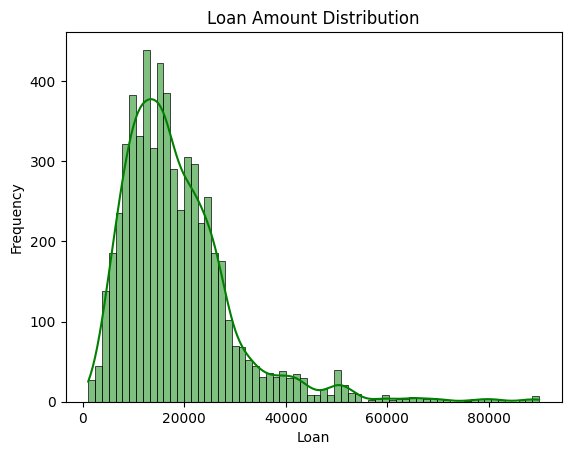

In [18]:
#create title and x and y mins with their corresponding labels
plt.title('Loan Amount Distribution')
plt.xlabel('Loan')
plt.ylabel('Frequency')
# create histogram
sns.histplot(data=df, x='LOAN',kde=True,color='green');

In [19]:
print(f"The range of values for loans taken out are between {df['LOAN'].min()} - {df['LOAN'].max()}, the average loan amount is {round(df['LOAN'].mean(),2)} ")

The range of values for loans taken out are between 1100 - 89900, the average loan amount is 18607.97 


Observations:

There are some very small loans, most likely for home improvement purposes but, the histogram plot is skewed right, which shows there are some high value loans taken out.

Question 2:

How does the distribution of years at present job "YOJ" vary across the dataset?

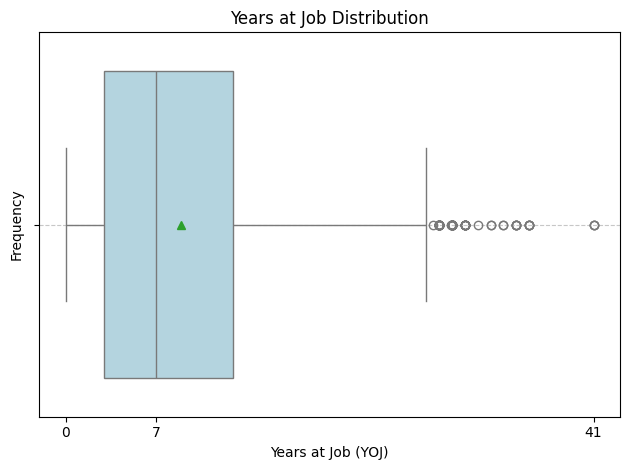

In [20]:
# Calculate descriptive statistics for YOJ to place in the boxplot
y_stats = df['YOJ'].describe()
min_y = y_stats['min']
max_y = y_stats['max']
median_y = y_stats['50%']  # 50th percentile is the median

# Create the boxplot with customizations
sns.boxplot(
    data=df,
    x='YOJ',
    color='lightblue',
    showmeans=True,  # Add mean as a diamond marker
)

# Customize plot elements
plt.title('Years at Job Distribution')
plt.xlabel('Years at Job (YOJ)')
plt.ylabel('Frequency')

# Set tick labels and adjust layout
plt.xticks([min_y, median_y, max_y], [f"{int(min_y)}", f"{int(median_y)}", f"{int(max_y)}"])  # Cast to int for formatting
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add faint gridlines on y-axis
plt.tight_layout()  # Improve layout


plt.show()


The median amount of years spent at a job is 7 years but the average is about 9 years. This shows that the financial stability of being at a certain job for longer might give people more security to take out a loan.

Question 3

How many unique categories are there in the REASON variable?

In [21]:
# Count occurrences of each value in "REASON"
reason_counts = df['REASON'].value_counts()

# Create the pie chart
fig = px.pie(reason_counts, values=reason_counts.values, names=reason_counts.index, title='Reasons for taking out loan')

#update traces and hide legend
fig.update_traces(textinfo='percent+label')
fig.update_layout(
    showlegend=False
)

# Display the pie chart
fig.show()


In [22]:
print(f"There are {df['REASON'].nunique()} unique categories in the REASON variable")


There are 2 unique categories in the REASON variable


The proportion of loans taken out for debt consolidation is more than double than those for home improvement.

Question 4

What is the most common category in the JOB variable?

In [23]:
# Calculate value counts and percentage for each job category
job_counts = df['JOB'].value_counts()
job_percentages = (job_counts / len(df)) * 100

# Create a DataFrame to hold counts and percentages
job_data = pd.DataFrame({'Job': job_counts.index, 'Counts': job_counts.values, 'Percentage': job_percentages.values})

# Get the category with the most value counts
most_common_job = job_counts.idxmax()

# Create a bar chart with Plotly
fig = px.bar(job_data, x='Job', y='Counts', text='Percentage', title='Distribution of Jobs',
             color='Job', color_discrete_sequence=['lightgray' if job != most_common_job else 'purple' for job in job_data['Job']])

# Add percentage labels
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Update x-axis labels rotation for better readability
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

In [24]:
print(f"The most common job category is {most_common_job }")

The most common job category is Other


The most common job category is other, meaning there is no one job category that stand out more than the rest. However after other the most common job is ProfExe which seems like the top rank out of all the other job categories.

Question 5

Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?

In [25]:
# Count occurrences of each value in "REASON"
reason_counts = df['REASON'].value_counts()

# Create the pie chart
fig = px.pie(reason_counts, values=reason_counts.values, names=reason_counts.index, title='Distribution of REASON')

#update traces and hide legend
fig.update_traces(textinfo='percent+label')
fig.update_layout(
    showlegend=False
)

# Display the pie chart
fig.show()

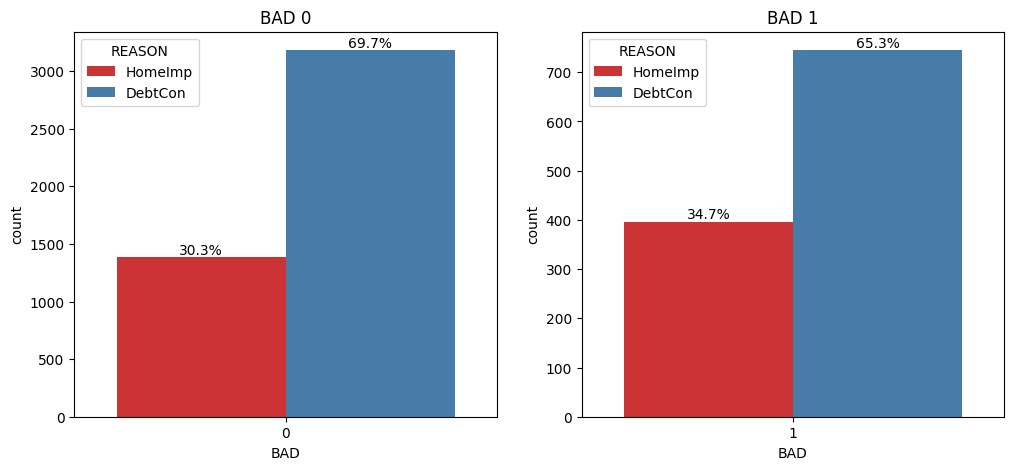

In [26]:
# Define a color palette for consistent legend categories
palette = sns.color_palette('Set1')

# Filter data for each BAD
df_BAD0 = df[df['BAD'] == 0]
df_BAD1 = df[df['BAD'] == 1]

# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for BAD 0 with palette
sns.countplot(data=df_BAD0, x='BAD', hue='REASON', ax=ax1, palette=palette)
total_BAD0 = df_BAD0['REASON'].value_counts().sum()
ax1.set_title('BAD 0')

# Annotate bars for BAD 0
for container in ax1.containers:
    heights = [p.get_height() for p in container.patches]
    labels = [f'{(h/total_BAD0 * 100):0.1f}%' for h in heights]
    ax1.bar_label(container, labels=labels)

# Plot for BAD 1 using the same palette
sns.countplot(data=df_BAD1, x='BAD', hue='REASON', ax=ax2, palette=palette)
total_BAD1 = df_BAD1['REASON'].value_counts().sum()
ax2.set_title('BAD 1')

# Annotate bars for BAD 1
for container in ax2.containers:
    heights = [p.get_height() for p in container.patches]
    labels = [f'{(h/total_BAD1 * 100):0.1f}%' for h in heights]
    ax2.bar_label(container, labels=labels)

# Improve legend clarity (optional)
handles, labels = ax2.get_legend_handles_labels()  # Get legend elements from second plot
ax1.legend(handles, labels, title='REASON')  # Add legend to first plot


plt.show()



In [27]:
#create a dataframe of each BAD with their first interaction count
REASON = df.groupby(['BAD', 'REASON']).size().unstack()

# Get percentages for each category for each BAD
percentages = (REASON / REASON.sum(axis=0)) * 100

# Print the result
print(round(percentages),2)

REASON  DebtCon  HomeImp
BAD                     
0          81.0     78.0
1          19.0     22.0 2


In [28]:
# Reset index to convert multi-index DataFrame to a flat DataFrame
percentages = percentages.reset_index()
# Melt the DataFrame to long format for plotting
melted_percentages = percentages.melt(id_vars='BAD', var_name='REASON', value_name='Percentage')

# Create a bar chart with Plotly
fig = px.bar(melted_percentages, x='REASON', y='Percentage', color='BAD', barmode='group',
             title='Percentage of Defaults for Each REASON')
fig.update_layout(xaxis_title='Reason', yaxis_title='Percentage')


# Add percentage labels
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

# Update x-axis labels rotation for better readability
fig.update_xaxes(tickangle=45)

In [29]:
# Group by REASON and calculate the average loan value for defaulted loans
avg_loan_defaulted = df[df['BAD'] == 1].groupby('REASON')['LOAN'].mean().reset_index()

# Print the result
print(avg_loan_defaulted)

    REASON          LOAN
0  DebtCon  18998.389262
1  HomeImp  12720.707071


Observations

At first we saw that loans that defaulted were 65%  from debt consolidation and 35% from home improvement.  This could lead us to believe that debtcon is more likely to default, but these percentages are because there are more loans overall from debt con 69% vs 31%.
Proportionally both reasons have a similar default rate. Debtcon has a 19% default rate vs 22% for home improvement.
However is it worth noting that the average value of loans that ended up defaulting is about 50% higher for DebtCon than HomeImp,
 $18,998 vs $12,720.

Question 6

Do applicants who default have a significantly different loan amount compared to those who repay their loan?

In [30]:
# Calculate the average loan amount for each value of BAD
avg_loan_by_bad = df.groupby('BAD')['LOAN'].mean().reset_index()

# Create a bar chart with Plotly
fig = px.bar(avg_loan_by_bad, x='BAD', y='LOAN', color='BAD',
             labels={'BAD': 'Default Status', 'LOAN': 'Average Loan Amount'},
             title='Average Loan Amount by Default Status')
# Show the value ticks on the bars
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig.update_layout(xaxis=dict(tickvals=[0, 1], ticktext=['0 (Non-Default)', '1 (Default)']))

# Show the plot
fig.show()

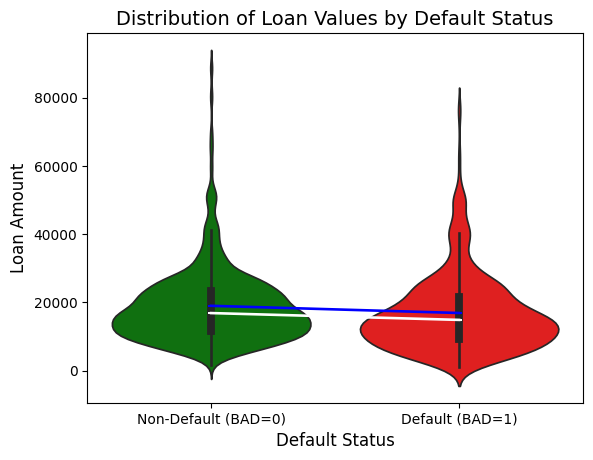

In [31]:

# Define a custom palette
custom_palette = {'0': 'green', '1': 'red'}

# Create the violin plot with custom colors
sns.violinplot(x='BAD', y='LOAN', data=df, palette=custom_palette)

# Set the title and axis labels
plt.title('Distribution of Loan Values by Default Status', fontsize=14)
plt.xlabel('Default Status', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)

# Add median and mean lines
sns.pointplot(x='BAD', y='LOAN', data=df.groupby('BAD')['LOAN'].median().reset_index(), color='white', markers='_', scale=0.7)
sns.pointplot(x='BAD', y='LOAN', data=df.groupby('BAD')['LOAN'].mean().reset_index(), color='blue', markers='_', scale=0.7)

# Add tick labels
plt.xticks(ticks=[0, 1], labels=['Non-Default (BAD=0)', 'Default (BAD=1)'])


# Show the plot
plt.show()

The average loan amount is surprisingly higher for people that did not default than for those who did, $19k vs $17k , the violin plots seem very similar, so there are no clear values for a loan amount that could indicate a default or not.

Question 7

Is there a correlation between the value of the property and the loan default rate?

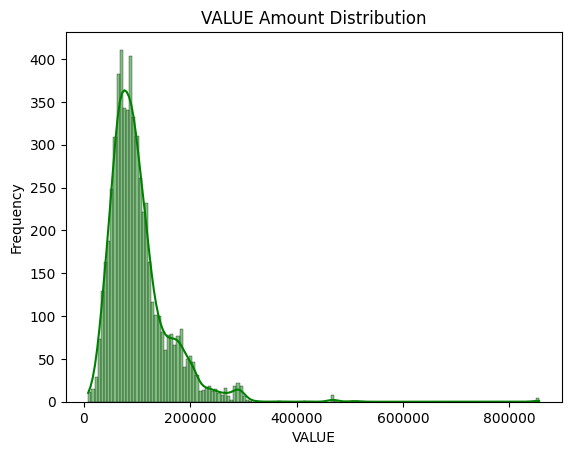

In [32]:
#create title and x and y mins with their corresponding labels
plt.title('VALUE Amount Distribution')
plt.xlabel('VALUE')
plt.ylabel('Frequency')
# create histogram
sns.histplot(data=df, x='VALUE',kde=True,color='green');

In [33]:
print(f"The range of values for loans taken out are between {df['VALUE'].min()} - {df['VALUE'].max()}, the average value for the current value of properties is {round(df['VALUE'].mean(),2)}")

The range of values for loans taken out are between 8000.0 - 855909.0, the average value for the current value of properties is 101776.05


In [34]:
#Next we will create a bar chart with value buckets to see the number of defaulted loans per bucket and the total loans.
# Define the bins for property value buckets
bins = [0, 50000, 75000, 100000, 250000, 500000, np.inf]
# Create labels for the buckets
labels = ['<50k', '50k-75k', '75k-100k', '100k-250k', '250k-500k', '500k+']

# Create buckets for property value
df['VALUE_Bucket'] = pd.cut(df['VALUE'], bins=bins, labels=labels)

# Calculate counts per bucket
total_loans_per_bucket = df.groupby('VALUE_Bucket')['BAD'].count()
defaulted_loans_per_bucket = df[df['BAD'] == 1].groupby('VALUE_Bucket')['BAD'].count()

# Combine data into a DataFrame
data = pd.DataFrame({
    'Bucket': total_loans_per_bucket.index,
    'Total Loans': total_loans_per_bucket.values,
    'Defaulted Loans (BAD=1)': defaulted_loans_per_bucket.values
})

# Create a bar chart with Plotly
fig = px.bar(
    data,
    x='Bucket',
    y='Total Loans',  # Set y-axis to Total Loans for stacking
    title='Loan Distribution by Property Value Bucket',
    barmode='stack',  # Stack bars to show both BAD=0 and BAD=1 counts
    custom_data=data[['Total Loans', 'Defaulted Loans (BAD=1)']]  # Data for hover labels
)

# Update trace appearanc
fig.update_traces(
    marker_color=['lightblue', 'coral'],
    marker_line_color='black',
    marker_line_width=1.5,
    opacity=0.8
)

# Customize layout and hover template
fig.update_layout(
    xaxis_title='Property Value Bucket',
    yaxis_title='Number of Loans',
    title='Loan Distribution by Property Value Bucket'
)

fig.update_traces(
    hovertemplate="<b>Bucket</b>: %{x}<br>"
                  "<b>Total Loans</b>: %{customdata[0]:,.0f}<br>"
                  "<b>Defaulted Loans (BAD=1)</b>: %{customdata[1]:,.0f}"
)


# Show the plot
fig.show()



We can see that  the highest number of default are where the value is between 100k and 250k with 350 defaulted loans but these are also the most common range of values. So next we will create the default ratio rate for each value bucket.

In [35]:
# Define the bins for property value buckets
bins = [0, 50000, 75000, 100000, 250000, 500000, np.inf]

# Create labels for the buckets
labels = ['<50k', '50k-75k', '75k-100k', '100k-250k', '250k-500k', '500k+']

# Create buckets for property value
df['VALUE_Bucket'] = pd.cut(df['VALUE'], bins=bins, labels=labels)

# Calculate total rows and defaulted rows (BAD=1) per bucket
total_loans_per_bucket = df.groupby('VALUE_Bucket')['BAD'].count()
defaulted_loans_per_bucket = df[df['BAD'] == 1].groupby('VALUE_Bucket')['BAD'].count()

# Calculate default rate (percentage) for each bucket
default_rate = (defaulted_loans_per_bucket / total_loans_per_bucket) * 100

# Combine data into a DataFrame
data = pd.DataFrame({'Bucket': default_rate.index, 'Default Rate (%)': default_rate.values})

# Create a bar chart with Plotly
fig = px.bar(data, x='Bucket', y='Default Rate (%)', title='Default Rate by Property Value Bucket')

# Customize color scale for gradient from green to red
fig.update_traces(marker=dict(color=data['Default Rate (%)'], coloraxis="coloraxis"))

# Customize axis labels and title
fig.update_layout(
    xaxis_title='Property Value Bucket',
    yaxis_title='Default Rate (%)',
    title='Default Rate by Property Value Bucket'
)

# Rotate x-axis labels if needed for better readability (optional)
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()


In [36]:
# Add a column to calculate the proportion of the loan amount vs the value of the property
df['PERCLOAN'] = df['LOAN'] / df['VALUE']

# Display the updated DataFrame
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,VALUE_Bucket,PERCLOAN
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,<50k,0.028187
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,50k-75k,0.019006
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,<50k,0.089820
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,100k-250k,0.015179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,75k-100k,0.985752
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,75k-100k,0.957638
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,75k-100k,0.959924
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,75k-100k,0.977564


In [37]:
# Filter the DataFrame to show only rows where 'VALUE' column is above 500000
df_above_500k = df[df['VALUE'] > 500000]

# Show the filtered DataFrame
df_above_500k

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,VALUE_Bucket,PERCLOAN
5545,1,35000,391000.0,505000.0,DebtCon,ProfExe,4.5,0.0,0.0,192.766667,0.0,22.0,NaN,500k+,0.069307
5586,1,36600,397299.0,512650.0,DebtCon,ProfExe,4.0,0.0,0.0,197.516684,0.0,21.0,43.458327,500k+,0.071394
5638,1,39000,399412.0,511164.0,DebtCon,ProfExe,5.0,0.0,0.0,181.962401,0.0,21.0,43.730032,500k+,0.076296
5665,1,40000,NaN,850000.0,HomeImp,Other,17.0,0.0,0.0,186.666667,1.0,24.0,NaN,500k+,0.047059
5706,1,41700,NaN,854112.0,HomeImp,Other,16.0,0.0,0.0,180.608878,0.0,23.0,42.071645,500k+,0.048823
5707,1,41700,NaN,854114.0,HomeImp,Other,18.0,0.0,0.0,189.099378,1.0,23.0,43.258779,500k+,0.048823
5752,1,43500,NaN,855909.0,HomeImp,Other,16.0,0.0,0.0,196.403636,0.0,23.0,42.985408,500k+,0.050823


In [38]:
# Filter the DataFrame to show only rows where 'VALUE' column is above 500000
df_below_50k = df[df['VALUE'] < 50000]

# Show the filtered DataFrame
df_below_50k

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,VALUE_Bucket,PERCLOAN
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,<50k,0.028187
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,<50k,0.089820
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,<50k,0.042163
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,<50k,0.041827
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN,<50k,0.042790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,1,43300,NaN,45924.0,DebtCon,Other,NaN,1.0,1.0,207.300730,0.0,17.0,33.678946,<50k,0.942862
5748,0,43300,NaN,48908.0,DebtCon,Other,NaN,5.0,NaN,123.402860,NaN,19.0,28.192353,<50k,0.885336
5751,0,43500,NaN,46571.0,DebtCon,Other,NaN,5.0,NaN,108.586633,NaN,19.0,29.371300,<50k,0.934058
5754,0,43700,NaN,48535.0,DebtCon,Other,NaN,6.0,NaN,95.719805,NaN,19.0,26.981183,<50k,0.900381


In [39]:
# Calculate the average PERCLOAN for each VALUE_Bucket
average_percloan_by_bucket = df.groupby('VALUE_Bucket')['PERCLOAN'].mean().reset_index()

# Display the DataFrame
print(average_percloan_by_bucket)

  VALUE_Bucket  PERCLOAN
0         <50k  0.409449
1      50k-75k  0.254669
2     75k-100k  0.196608
3    100k-250k  0.154879
4    250k-500k  0.126107
5        500k+  0.058932


In [40]:
df['PERCLOAN'].mean()

0.21659665742902243

Interestingly we can see that all property valued higher than 500,000 defaulted. This is counter intuitive, because we would think that the larger the value of the property, the more interest there would be in paying off the loan. We also added the PERC_LOAN column to see the percentage of the loan vs the value of the propoerty. All the 500K plus ones are between 5%-10% which is below the standard of 21%.  
Another interesting find is that the PERCLOAN ratio gets lower as the value of the property goes up, this could indicate a flaw in the banks loan approval process because, there are some lower loans that are almost the same as the value of the property. Generally you would want the loan value to be at about 20% of the value of the propoerty, in case the customer defaults and you have to go against the property to recover your money.
Property values between 50k and 500k have a default rate of about 16%, while over 500k are 100% and below 50k at 31%. The bank could pay special notice to these small loans and what security asset they have against defaults in this case.

Question 8

Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

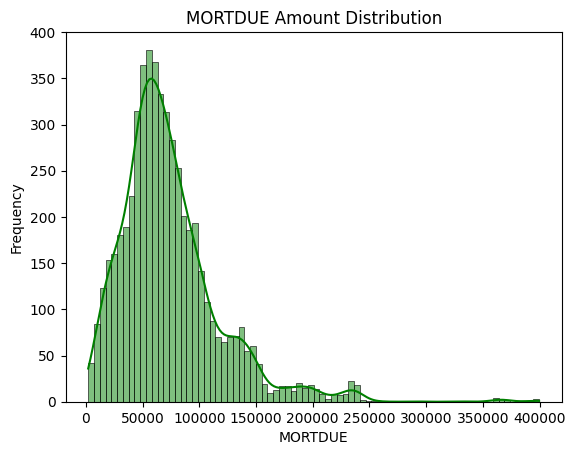

In [41]:
#First lets visualize the distribution of mortgages due
#create title and x and y mins with their corresponding labels
plt.title('MORTDUE Amount Distribution')
plt.xlabel('MORTDUE')
plt.ylabel('Frequency')
# create histogram
sns.histplot(data=df, x='MORTDUE',kde=True,color='green');

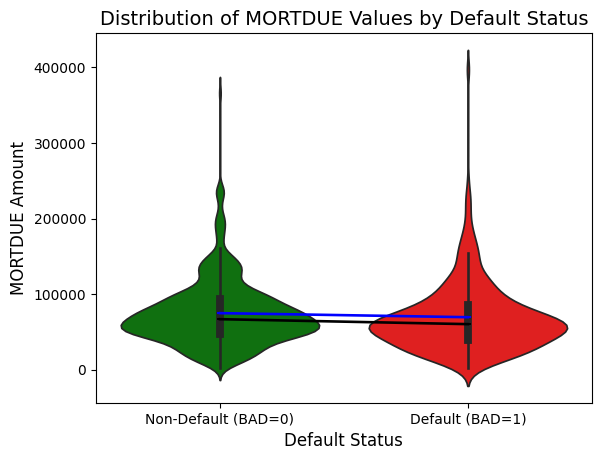

In [42]:
#Next we will create a violin plot to see the distribution of mortgages due by default status
# Define a custom palette
custom_palette = {'0': 'green', '1': 'red'}

# Create the violin plot with custom colors
sns.violinplot(x='BAD', y='MORTDUE', data=df, palette=custom_palette)

# Set the title and axis labels
plt.title('Distribution of MORTDUE Values by Default Status', fontsize=14)
plt.xlabel('Default Status', fontsize=12)
plt.ylabel('MORTDUE Amount', fontsize=12)

# Add median and mean lines
sns.pointplot(x='BAD', y='MORTDUE', data=df.groupby('BAD')['MORTDUE'].median().reset_index(), color='black', markers='_', scale=0.7)
sns.pointplot(x='BAD', y='MORTDUE', data=df.groupby('BAD')['MORTDUE'].mean().reset_index(), color='blue', markers='_', scale=0.7)

# Add tick labels
plt.xticks(ticks=[0, 1], labels=['Non-Default (BAD=0)', 'Default (BAD=1)'])


# Show the plot
plt.show()

In [43]:
#next we will visualize the average of the mortdue for each status
# Calculate the average MORTDUE amount for each value of BAD
avg_MORTDUE_by_bad = df.groupby('BAD')['MORTDUE'].mean().reset_index()

# Create a bar chart with Plotly
fig = px.bar(avg_MORTDUE_by_bad, x='BAD', y='MORTDUE', color='BAD',
             labels={'BAD': 'Default Status', 'MORTDUE': 'Average MORTDUE Amount'},
             title='Average MORTDUE Amount by Default Status')
# Show the value ticks on the bars
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')

# Update the layout to include ticks for the BAD values
fig.update_layout(xaxis=dict(tickvals=[0, 1], ticktext=['0 (Non-Default)', '1 (Default)']))

# Show the plot
fig.show()

This first analysis doesnt show us much as both the violin plot and the average mortdue values are very similar between defaults and non defaults.

In [44]:
#next we will create a similar graph as the one we did for the MORTDUEs of the properties, by diving the mortgage due in buckets and calculating their default ratios

# Define the bins for property MORTDUE buckets
bins = [0, 50000, 75000, 100000, 250000, np.inf]

# Create labels for the buckets
labels = ['<50k', '50k-75k', '75k-100k', '100k-250k', '250k-500k']

# Create buckets for property MORTDUE
df['MORTDUE_Bucket'] = pd.cut(df['MORTDUE'], bins=bins, labels=labels)

# Calculate total rows and defaulted rows (BAD=1) per bucket
total_loans_per_bucket = df.groupby('MORTDUE_Bucket')['BAD'].count()
defaulted_loans_per_bucket = df[df['BAD'] == 1].groupby('MORTDUE_Bucket')['BAD'].count()

# Calculate default rate (percentage) for each bucket
default_rate = (defaulted_loans_per_bucket / total_loans_per_bucket) * 100

# Combine data into a DataFrame
data = pd.DataFrame({'Bucket': default_rate.index, 'Default Rate (%)': default_rate.values})

# Create a bar chart with Plotly
fig = px.bar(data, x='Bucket', y='Default Rate (%)', title='Default Rate by Property MORTDUE Bucket')

# Customize color scale for gradient from green to red
fig.update_traces(marker=dict(color=data['Default Rate (%)'], coloraxis="coloraxis"))

# Customize axis labels and title
fig.update_layout(
    xaxis_title='Property MORTDUE Bucket',
    yaxis_title='Default Rate (%)',
    title='Default Rate by Property MORTDUE Bucket'
)

# Rotate x-axis labels if needed for better readability (optional)
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

In [45]:
# Add a column to calculate the proportion of the loan amount vs the mortgage due
df['PERCMORT'] = df['LOAN'] / df['MORTDUE']

# Display the updated DataFrame
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,VALUE_Bucket,PERCLOAN,MORTDUE_Bucket,PERCMORT
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,<50k,0.028187,<50k,0.042537
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,50k-75k,0.019006,50k-75k,0.018557
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,<50k,0.089820,<50k,0.111111
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,100k-250k,0.015179,75k-100k,0.017382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,75k-100k,0.985752,50k-75k,1.552459
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,75k-100k,0.957638,50k-75k,1.630753
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,75k-100k,0.959924,50k-75k,1.650476
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,75k-100k,0.977564,50k-75k,1.782807


In [46]:
# Calculate the average PERCMORT for each MORT_Bucket
average_percmort_by_bucket = df.groupby('MORTDUE_Bucket')['PERCMORT'].mean().reset_index()

# Display the DataFrame
print(average_percmort_by_bucket)

  MORTDUE_Bucket  PERCMORT
0           <50k  0.770792
1        50k-75k  0.265031
2       75k-100k  0.198753
3      100k-250k  0.173017
4      250k-500k  0.111291


In [47]:
df['PERCMORT'].mean()

0.386116725877821

In [48]:
average_percmort_by_bucket = df.groupby(['MORTDUE_Bucket', 'BAD'])['PERCMORT'].mean().reset_index()

# Display the DataFrame
average_percmort_by_bucket

,MORTDUE_Bucket,BAD,PERCMORT
0,<50k,0,0.821716
1,<50k,1,0.613829
2,50k-75k,0,0.269218
3,50k-75k,1,0.248160
4,75k-100k,0,0.194116
5,75k-100k,1,0.225798
6,100k-250k,0,0.172804
7,100k-250k,1,0.174004
8,250k-500k,0,0.112954
9,250k-500k,1,0.109154


This analysis showed us many things.
The first being that the highest default rate is where the mortgage due is higher than 250k with over 43% default rate, followed by where mortgage due is lower than 50k at 24%.
We added a new column that compares the loan amount vs the mortgage due, the average ratio is 38% this tell us that most loans taken out are lower than the mortgage already due. However we can see that for the small mortgages due the percentage is higher, indicating that these could be second mortgages taken out or smaller loans for home improvement.

### **Univariate Analysis**


First we will analyze the frequency distrbution of some of the variables we havent yet studied like

DEROG: Number of major derogatory reports (which indicates a serious delinquency or late payments).

DELINQ: Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

CLAGE: Age of the oldest credit line in months.

NINQ: Number of recent credit inquiries.

CLNO: Number of existing credit lines.

DEBTINC: Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

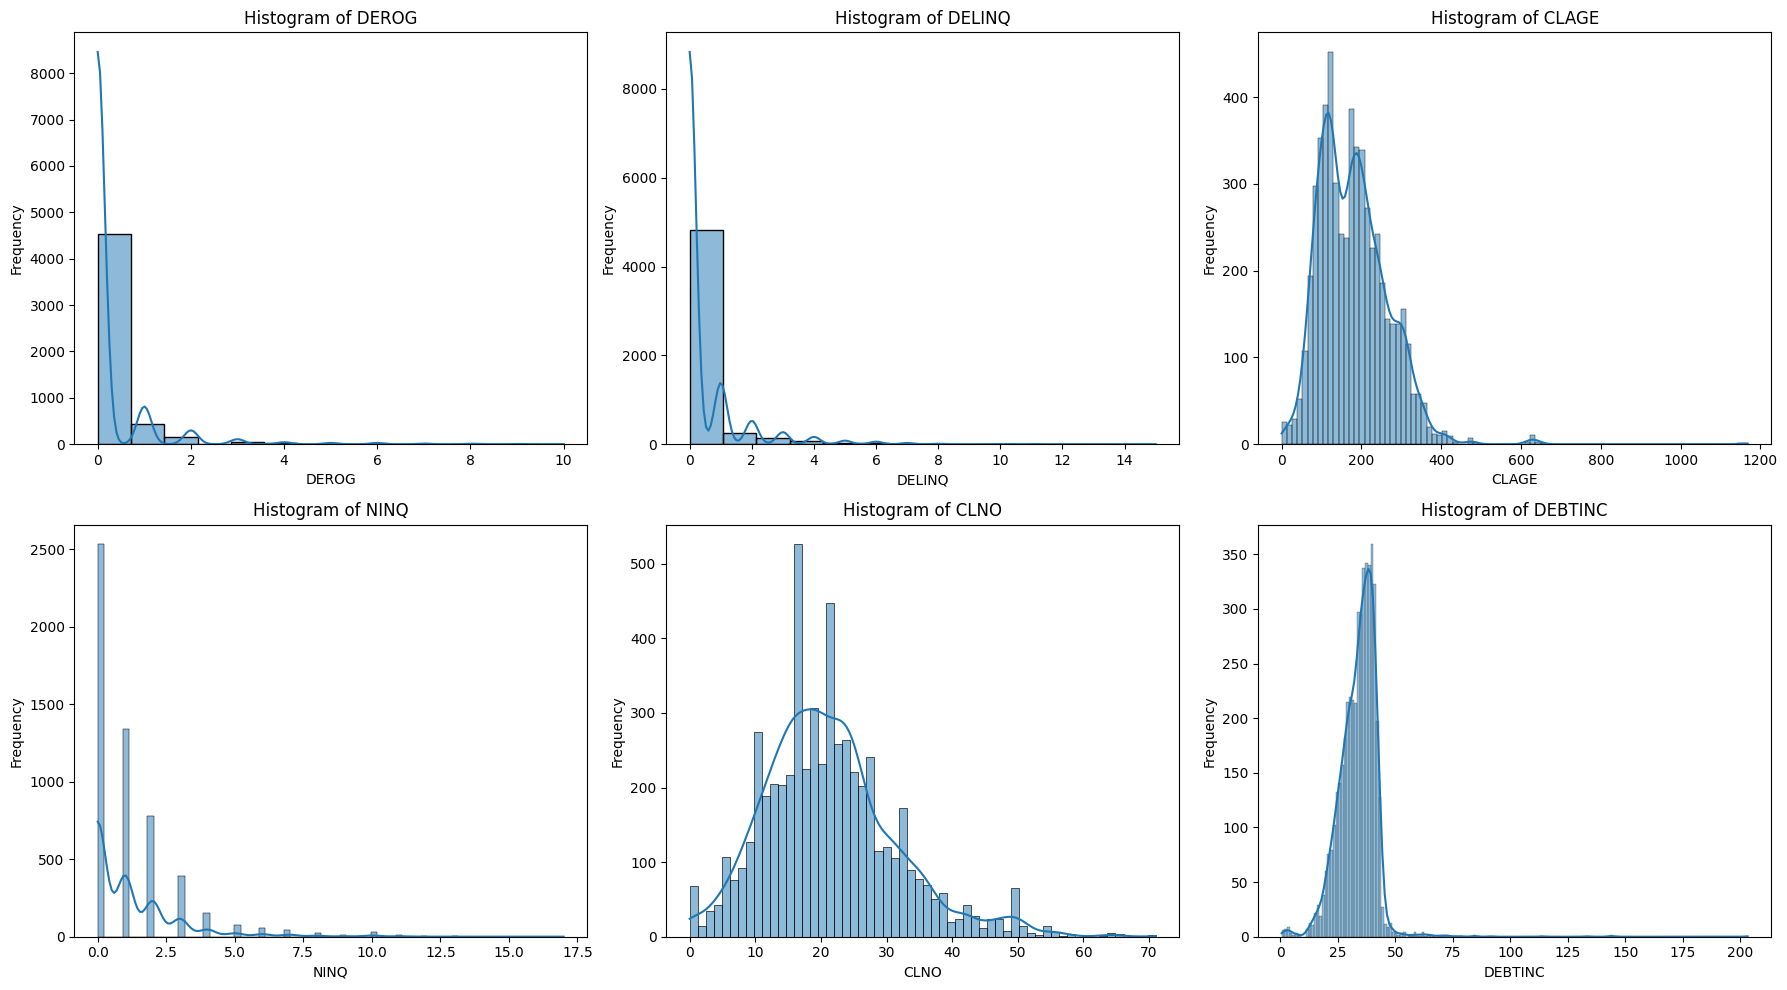

In [49]:
# Define the columns for which histograms will be created
columns = ['DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create histograms for each column
for i, column in enumerate(columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

There are some clear distributions in all of the different variables. These graphs will give us a initial understanding for these variables for our upcoming analysis of each.

### **Bivariate Analysis**

We will start of by seeing the average loan amount for each reason

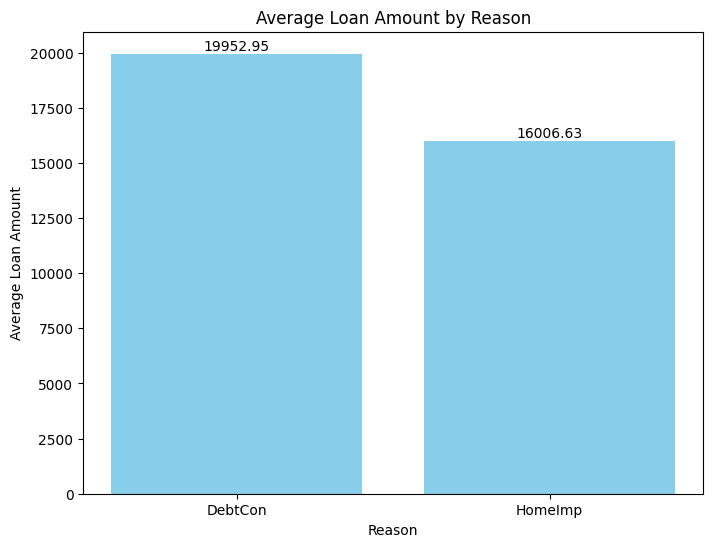

In [50]:
# Calculate average loan amount for each reason
average_loan_by_reason = df.groupby('REASON')['LOAN'].mean().reset_index()

# Plot the result
plt.figure(figsize=(8, 6))
bars = plt.bar(average_loan_by_reason['REASON'], average_loan_by_reason['LOAN'], color='skyblue')
plt.xlabel('Reason')
plt.ylabel('Average Loan Amount')
plt.title('Average Loan Amount by Reason')

# Add number labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

It is expected that debt consolidation has a higher loan amount than loan improvements but I expected the difference to be larger between the two.

Next we will analyze how the derogatory reports and delinquent credit lines affect loan defaults

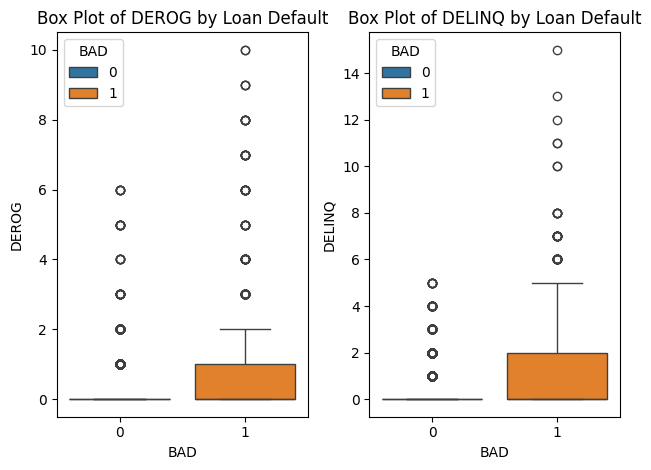

In [51]:
# Box plot for DEROG
plt.subplot(1, 2, 1)
sns.boxplot(x='BAD', y='DEROG', data=df,hue='BAD')
plt.title('Box Plot of DEROG by Loan Default')

# Box plot for DELINQ
plt.subplot(1, 2, 2)
sns.boxplot(x='BAD', y='DELINQ', data=df,hue='BAD')
plt.title('Box Plot of DELINQ by Loan Default')

plt.tight_layout()
plt.show()

These box plots show that the more DEROG reports or DELINQ lines the more likely the default. Lets analyze this further

In [52]:
proportion_by_value = df.groupby(['DEROG', 'DELINQ'])['BAD'].mean().reset_index()

# Rename the column to represent proportion
proportion_by_value = proportion_by_value.rename(columns={'BAD': 'Proportion Defaulted'})

# Calculate proportion of 'BAD' == 0
proportion_by_value['Proportion Repaid'] = 1 - proportion_by_value['Proportion Defaulted']

# Display the DataFrame
proportion_by_value

,DEROG,DELINQ,Proportion Defaulted,Proportion Repaid
0,0.0,0.0,0.118902,0.881098
1,0.0,1.0,0.310421,0.689579
2,0.0,2.0,0.414966,0.585034
3,0.0,3.0,0.549296,0.450704
4,0.0,4.0,0.594595,0.405405
...,...,...,...,...
61,9.0,0.0,1.000000,0.000000
62,9.0,1.0,1.000000,0.000000
63,9.0,4.0,1.000000,0.000000
64,10.0,0.0,1.000000,0.000000


This data frame shows us how the porportion of defaults rises significantly as these bad reports increase. Lets visualize it in a heatmap next

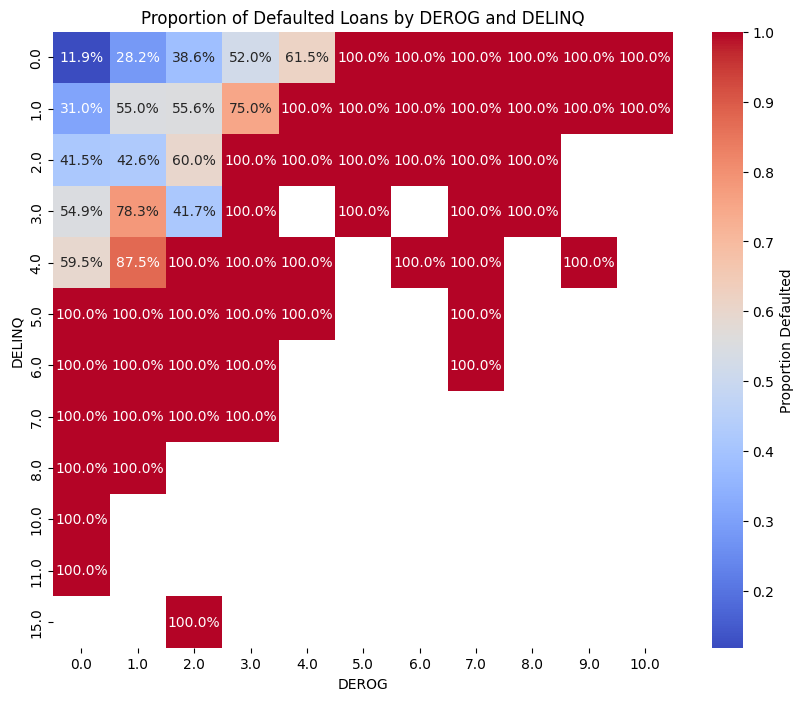

In [53]:
heatmap_data = proportion_by_value.pivot(index='DELINQ', columns='DEROG', values='Proportion Defaulted')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1%", cbar_kws={'label': 'Proportion Defaulted'})
plt.title('Proportion of Defaulted Loans by DEROG and DELINQ')
plt.xlabel('DEROG')
plt.ylabel('DELINQ')
plt.show()

This heatmap is extremely insightful. First off if either DEROG or DELINQ is larger than or equal to 5, there is a 100% chance of default. The more DELINQ  or DEROG, the more likely the default if they have one or the other, but as soon as you have a combination of both, the probability skyrockets.
This information can tell the bank to be extremely cautious to approve loans when customer have either of these bad reports.

<Axes: xlabel='YOJ'>

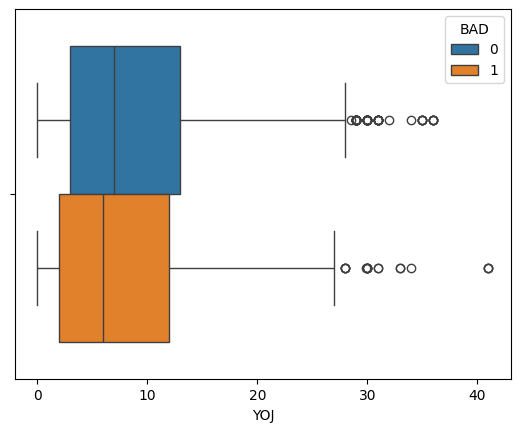

In [54]:
#Next we will analyze if years at current job have any implcations vs loan defailts.
# Boxplot for 'YOJ'
sns.boxplot(x="YOJ", hue="BAD", data=df)

There doesnt seem to be any major patterns. Except that defaults have a slightly lower distribution at years at current job, which makes sense. You want people who have more time at their job for more financial stability.

Next we will analyze the other 4 variables we have yet to study.

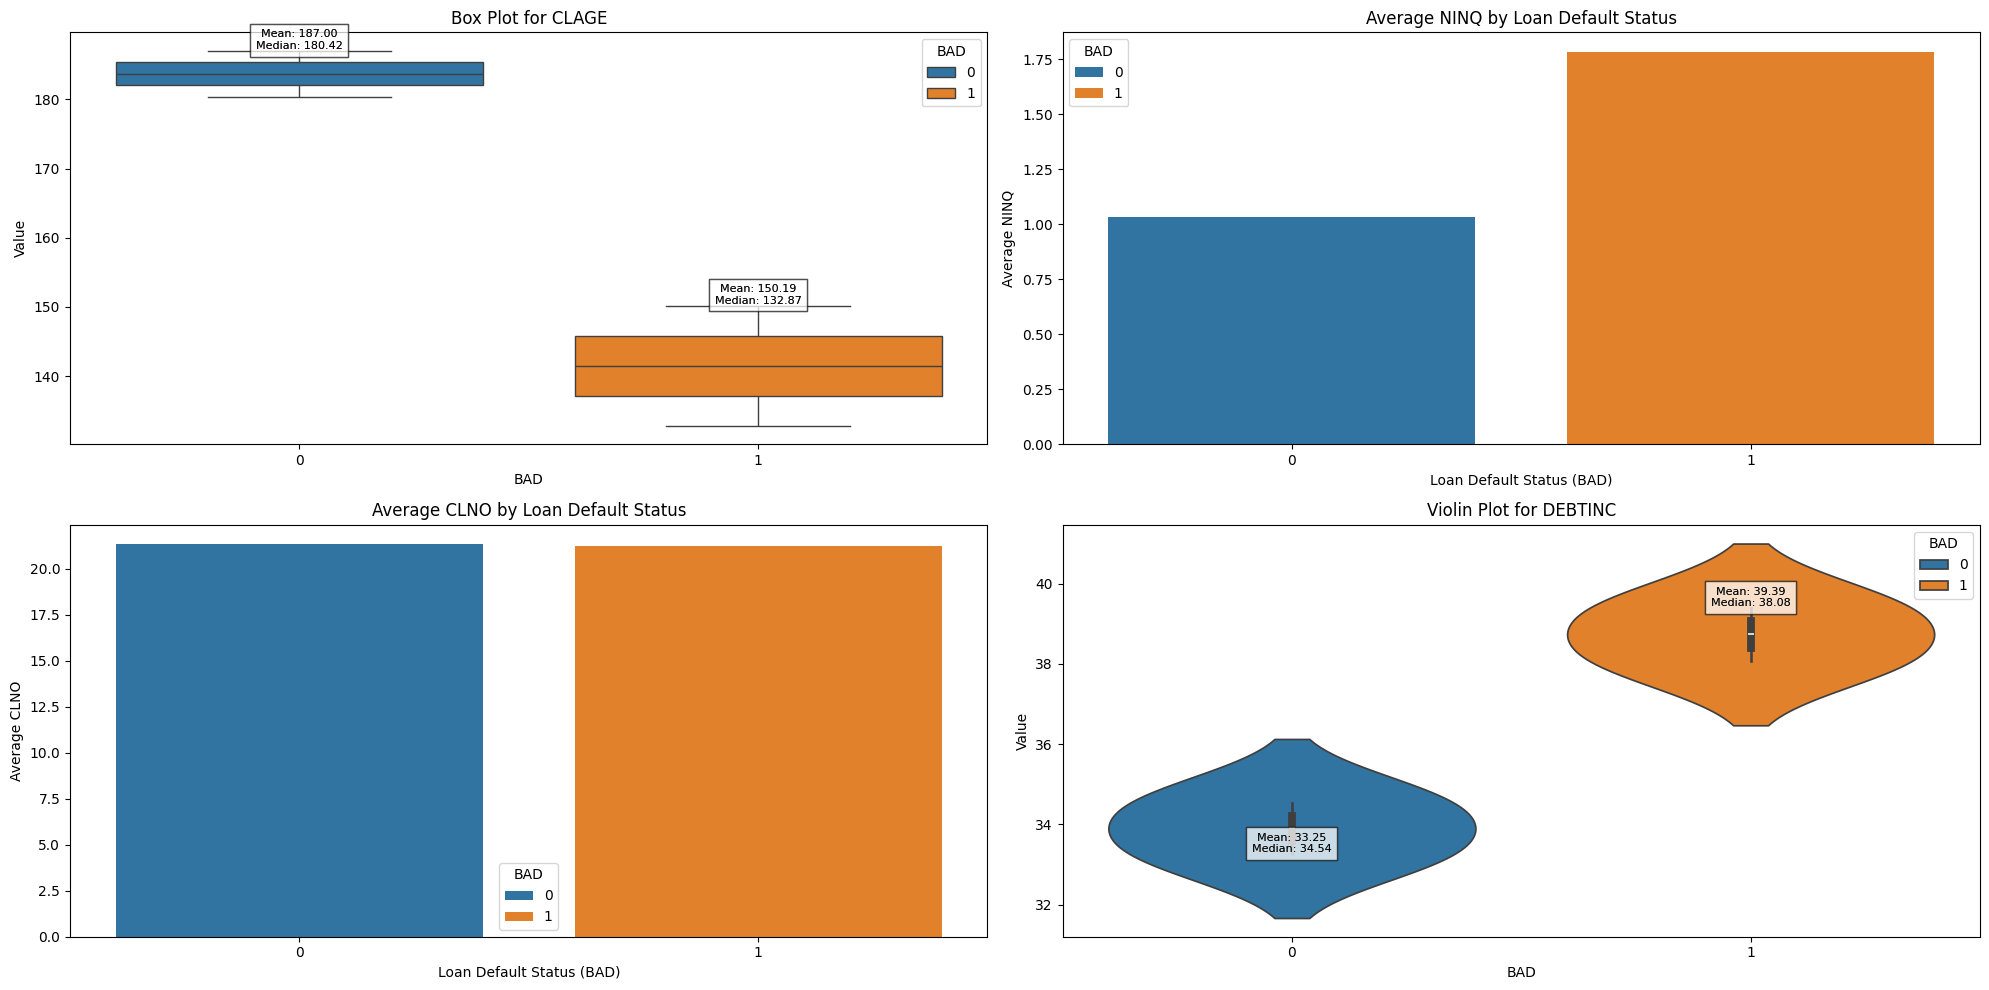

In [55]:
# Calculate mean and median for each variable
summary_stats = df.groupby('BAD').agg({'CLAGE': ['mean', 'median'], 'NINQ': ['count'], 'CLNO': ['count'], 'DEBTINC': ['mean', 'median']})

# Reshape summary stats DataFrame for easier plotting
summary_stats = summary_stats.stack(level=[0, 1]).reset_index()
summary_stats.columns = ['BAD', 'Variable', 'Stat', 'Value']

# Plotting
plt.figure(figsize=(20, 10))

# Box plot for 'CLAGE'
plt.subplot(2, 2, 1)
sns.boxplot(x='BAD',hue='BAD', y='Value', data=summary_stats[summary_stats['Variable'] == 'CLAGE'])
plt.title('Box Plot for CLAGE')

# Count plot for 'NINQ'
# Calculate the average value of NINQ for each BAD
average_ninq_by_bad = df.groupby('BAD')['NINQ'].mean().reset_index()
plt.subplot(2, 2, 2)
sns.barplot(x='BAD', hue='BAD',y='NINQ', data=average_ninq_by_bad)
plt.title('Average NINQ by Loan Default Status')
plt.xlabel('Loan Default Status (BAD)')
plt.ylabel('Average NINQ')

# Count plot for 'CLNO'
# Calculate the average value of CLNO for each BAD
average_clno_by_bad = df.groupby('BAD')['CLNO'].mean().reset_index()
plt.subplot(2, 2, 3)
sns.barplot(x='BAD', hue='BAD',y='CLNO', data=average_clno_by_bad)
plt.title('Average CLNO by Loan Default Status')
plt.xlabel('Loan Default Status (BAD)')
plt.ylabel('Average CLNO')

# Violin plot for 'DEBTINC'
plt.subplot(2, 2, 4)
sns.violinplot(x='BAD',hue='BAD', y='Value', data=summary_stats[summary_stats['Variable'] == 'DEBTINC'])
plt.title('Violin Plot for DEBTINC')

# Adding mean and median annotations
for var in ['CLAGE', 'DEBTINC']:
    for i, stat in summary_stats[summary_stats['Variable'] == var].groupby(['BAD', 'Stat']):
        mean_idx = summary_stats[(summary_stats['BAD'] == i[0]) & (summary_stats['Variable'] == var) & (summary_stats['Stat'] == 'mean')].index[0]
        median_idx = summary_stats[(summary_stats['BAD'] == i[0]) & (summary_stats['Variable'] == var) & (summary_stats['Stat'] == 'median')].index[0]
        plt.subplot(2, 2, ['CLAGE', 'NINQ', 'CLNO', 'DEBTINC'].index(var) + 1)
        plt.text(i[0], summary_stats.loc[mean_idx, 'Value'], f"Mean: {summary_stats.loc[mean_idx, 'Value']:.2f}\nMedian: {summary_stats.loc[median_idx, 'Value']:.2f}", fontsize=8, ha='center', va='bottom', color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

In [56]:
# Calculate the average value of CLNO for each BAD
average_clno_by_bad = df.groupby('BAD')['CLNO'].mean().reset_index()

# Display the DataFrame
print(average_clno_by_bad)

   BAD       CLNO
0    0  21.317036
1    1  21.211268


There are several interesting insights for these plots.

With CLAGE which stands for age of the oldest credit line in months, we can see that  as expected the people who has older credit lines, on average older than 15 years, are most likely not to default. While very new credit lines (a year or lower) are more likely to default. This could be a very good indicator to predict defaults as well.

For NINQ which is number of recent credit inquiries, people who defaulted have a higher number, on average 1.75 recent inquiries, this tell us that the person is probably looking for credit but may be getting rejected elsewhere due to bad credit. So manu recent credit inquiries could also be a tell that a customer may not pay back the loan.

For CLNO which is number of existing credit lines, we see no noticeable differece between both categories. This might not tell us much.

For DEBTINC  or debt to income ratio, the defaults have a slightly higher average 39% vs  33%, but this column has a lot of missing values so this could affect predictive power.

### **Multivariate Analysis**

We will start our multivariate analysis by analyzing further some of the columns that caught our eye most in all the previous graphs.

In [57]:
# Create the scatter plot with customized colors
fig = px.scatter(df, x="CLAGE", y="NINQ", color="BAD")
fig.show()

This scatterplot confirms two hunches we had, the first that as NINQ increases we see a greater proportion of defaults. The second one is that as CLAGE increases we see less defaults on the right side.  This graph confirms that CLAGE is positively related to defautls while NINQ is negatively related to defaults.

In [58]:
# Filter out rows with NaN values in the 'VALUE' column
df_filtered_values = df.dropna(subset=['VALUE'])

# Create the scatter plot with filtered data
fig = px.scatter(df_filtered_values, x="DEROG", y="NINQ", size="VALUE", color="BAD",
                 hover_name="REASON",log_x=True, size_max=80)
fig.show()

In this scatter plot we are plotting our two bad variables DEROG and DELINQ, to confirm that both of these have a very strong relationship to defaults. We can visually see that when either variables are greater than 2 there is a very high chance of default. Also we included the VALUE of the property to confirm what we saw earliers, that very high VALUES and very low values indicate a higher chance of default.

In [59]:
df_filtered = df.dropna(subset=['REASON'])


# Group by 'REASON' and 'JOB' and sum 'BAD' values
df_filtered = df_filtered.groupby(['REASON', 'JOB']).agg({'BAD': 'mean', 'MORTDUE': 'mean'}).reset_index()

# Create the treemap figure using Plotly Express for the filtered DataFrame
fig_filtered = px.treemap(df_filtered, path=['REASON', 'JOB'], values='BAD',
                          color='MORTDUE', hover_data=['BAD'],
                          color_continuous_scale='RdBu',
                          color_continuous_midpoint=df_filtered['MORTDUE'].mean())
fig_filtered.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig_filtered.show()

This tree map shows us the ratio of defaults for each Reason and then for each Job Category. The color is based on the MORTDUE column. There are a lot of great insights we learn from this.

First we can see that in REASON, home improvements have a lower Mortgage due value in genereal. This makes sense as debt con is probably people who are looking to get lower interest rates for their mortgages.

Secondly we can see that for Debtcon  self employed people and people that work in sales have a much larger default ratio, this makes sense because these type of jobs have less financial stability than other types of jobs. This can help the bank immensely when filtering out potential loan candidates.

Lastly we see that in both types of REASONS  Office and ProfExe jobs have the lowest default rate, but Office have lower mortgage due amounts that Profexe which makes sense because we assume Profexe have higher incomes. but still office jobs have stability and they pay off their loans, even if they are smaller.  

In [60]:
fig = px.box(df, x="NINQ", y="DEBTINC", color="BAD",notched=True)
fig.show()

Next we are plotting in a series of boxplots, NINQ vs DEBTINC by BAD status. Here we can confirm that higher amounts of NINQ have more likelyhood to default and at the same time we see higher ratios of debt to income also lead to more defaults.

We will conclude our multivariate analysis with a heat map to see the correalation between features.

In [61]:
#first lets see how our dataset looks now, to check if we need to modify it for the heat map
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,VALUE_Bucket,PERCLOAN,MORTDUE_Bucket,PERCMORT
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,<50k,0.028187,<50k,0.042537
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,50k-75k,0.019006,50k-75k,0.018557
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,<50k,0.089820,<50k,0.111111
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,100k-250k,0.015179,75k-100k,0.017382


In [62]:
#encode categorical variables for the heat map and drop the value and mortdue bucket columns we created earlier
df_encoded= df.drop(['VALUE_Bucket','MORTDUE_Bucket'], axis=1)
df_encoded = pd.get_dummies(df_encoded,drop_first=True)


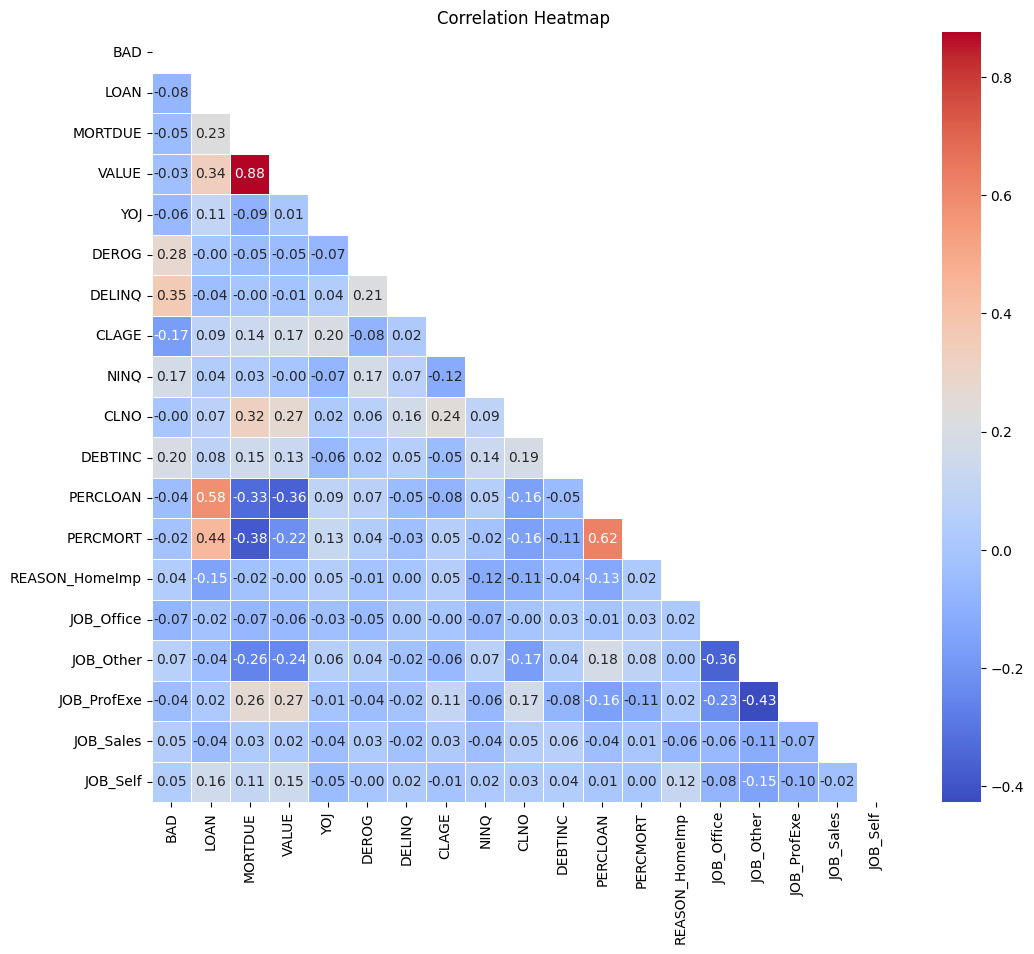

In [63]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Our heatmap reflects that property is highly positvely correlated to mortgage due, this makes sense because higher valued properties required a larger mortgage and they take a longer time to pay off.



## Treating Missing Values

We will treat our missing values, and then treat outliers, this is because when treating outliers, we got some errors in the zscore for columns that had missing values.

In [64]:
#Create a column that gives us the % of NaN values per row
df['nan_percent'] = (df.isna().sum(axis=1) / df.shape[1]) * 100

In [65]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,VALUE_Bucket,PERCLOAN,MORTDUE_Bucket,PERCMORT,nan_percent
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,<50k,0.028187,<50k,0.042537,5.882353
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,50k-75k,0.019006,50k-75k,0.018557,5.882353
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,<50k,0.089820,<50k,0.111111,5.882353
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.235294
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,100k-250k,0.015179,75k-100k,0.017382,5.882353


First we will drop all rows were more than 80% of the information is null because these rows wont add value to our analysis.

In [66]:
# Drop rows where % of NaN is greater than 80%
df_filtered = df[df['nan_percent'] <= 80]

# Drop the 'nan_percent' column as it's no longer needed
df_filtered = df_filtered.drop(columns=['nan_percent'])

# Now df_filtered contains rows where the percentage of NaN values is not greater than 80%

In [67]:
print("Number of rows in df:", len(df))
print("Number of rows in df_filtered:", len(df_filtered))

Number of rows in df: 5960
Number of rows in df_filtered: 5952


A total of 8 rows were dropped, so not much, lets continue by seeing the % of null values per column again.

In [68]:
# Check for null values count and percentages of null values per column

total = df_filtered.shape[0]  # Total number of rows in the DataFrame
null_counts = df_filtered.isnull().sum() #Sum of null values
null_percentages = (null_counts / total) * 100

print("Number of null values:\n", null_counts)
print("\nPercentage of null values:\n",  null_percentages)

Number of null values:
 BAD                  0
LOAN                 0
MORTDUE            510
VALUE              104
REASON             244
JOB                271
YOJ                507
DEROG              700
DELINQ             572
CLAGE              300
NINQ               502
CLNO               214
DEBTINC           1265
VALUE_Bucket       104
PERCLOAN           104
MORTDUE_Bucket     510
PERCMORT           510
dtype: int64

Percentage of null values:
 BAD                0.000000
LOAN               0.000000
MORTDUE            8.568548
VALUE              1.747312
REASON             4.099462
JOB                4.553091
YOJ                8.518145
DEROG             11.760753
DELINQ             9.610215
CLAGE              5.040323
NINQ               8.434140
CLNO               3.595430
DEBTINC           21.253360
VALUE_Bucket       1.747312
PERCLOAN           1.747312
MORTDUE_Bucket     8.568548
PERCMORT           8.568548
dtype: float64


For MORTDUE, VALUE and DEBTINC columns we are going to fill in these missing values with the most common proportion of each vs the LOAN column which has no missing values.

In [69]:
# Calculate the proportion of 'MORTDUE', 'VALUE', and 'DEBTINC' to 'LOAN' for existing non-null values
df_filtered['mortdue_loan_ratio'] = df_filtered['MORTDUE'] / df_filtered['LOAN']
df_filtered['value_loan_ratio'] = df_filtered['VALUE'] / df_filtered['LOAN']
df_filtered['debtinc_loan_ratio'] = df_filtered['DEBTINC'] / df_filtered['LOAN']

# Find the most common proportion for each ratio
most_common_mort_ratio = df_filtered['mortdue_loan_ratio'].mode().iloc[0]
most_common_value_ratio = df_filtered['value_loan_ratio'].mode().iloc[0]
most_common_debtinc_ratio = df_filtered['debtinc_loan_ratio'].mode().iloc[0]

# Fill missing 'MORTDUE', 'VALUE', and 'DEBTINC' values based on the most common proportion
df_filtered['MORTDUE'] = df_filtered['MORTDUE'].fillna(df_filtered['LOAN'] * most_common_mort_ratio)
df_filtered['VALUE'] = df_filtered['VALUE'].fillna(df_filtered['LOAN'] * most_common_value_ratio)
df_filtered['DEBTINC'] = df_filtered['DEBTINC'].fillna(df_filtered['LOAN'] * most_common_debtinc_ratio)

# Now, 'MORTDUE', 'VALUE', and 'DEBTINC' missing values are filled based on the most common proportion
print(df_filtered.isnull().sum())



BAD                      0
LOAN                     0
MORTDUE                  0
VALUE                    0
REASON                 244
JOB                    271
YOJ                    507
DEROG                  700
DELINQ                 572
CLAGE                  300
NINQ                   502
CLNO                   214
DEBTINC                  0
VALUE_Bucket           104
PERCLOAN               104
MORTDUE_Bucket         510
PERCMORT               510
mortdue_loan_ratio     510
value_loan_ratio       104
debtinc_loan_ratio    1265
dtype: int64


For our categorical values we are going to replace the missing values for the mode, but depending on a new column we will create with Loan bucket values.

In [70]:
# Define the bins for the 'LOAN' column
bins = [0, 10000, 30000, 50000, 70000, 90000]  # Adjust the bin edges as needed
labels = ['<10k', '10k-30k', '30k-50k', '50k-70k', '70k-90k']  # Define bucket labels

# Create buckets for the 'LOAN' column
df_filtered['LOAN_bucket'] = pd.cut(df_filtered['LOAN'], bins=bins, labels=labels)

# Fill missing values for 'REASON' and 'JOB' columns based on mode of each 'LOAN' bucket
for bucket in labels:
    mode_reason = df_filtered[df_filtered['LOAN_bucket'] == bucket]['REASON'].mode().iloc[0]
    mode_job = df_filtered[df_filtered['LOAN_bucket'] == bucket]['JOB'].mode().iloc[0]
    df_filtered.loc[df_filtered['LOAN_bucket'] == bucket, 'REASON'] = df_filtered.loc[df_filtered['LOAN_bucket'] == bucket, 'REASON'].fillna(mode_reason)
    df_filtered.loc[df_filtered['LOAN_bucket'] == bucket, 'JOB'] = df_filtered.loc[df_filtered['LOAN_bucket'] == bucket, 'JOB'].fillna(mode_job)

# Drop the 'LOAN_bucket' column if it's no longer needed
df_filtered = df_filtered.drop(columns=['LOAN_bucket'])

In [71]:
print(df_filtered.isnull().sum())

BAD                      0
LOAN                     0
MORTDUE                  0
VALUE                    0
REASON                   0
JOB                      0
YOJ                    507
DEROG                  700
DELINQ                 572
CLAGE                  300
NINQ                   502
CLNO                   214
DEBTINC                  0
VALUE_Bucket           104
PERCLOAN               104
MORTDUE_Bucket         510
PERCMORT               510
mortdue_loan_ratio     510
value_loan_ratio       104
debtinc_loan_ratio    1265
dtype: int64


Finally we will fin in the missing values with the median but grouped by JOB, REASON and BAD

In [72]:
# Define the columns for which missing values will be filled
columns_to_fill = ['YOJ', 'CLAGE', 'NINQ', 'CLNO','DEROG','DELINQ']

# Group by 'BAD', 'JOB', and 'REASON' and fill missing values with median
for column in columns_to_fill:
    df_filtered[column] = df_filtered.groupby(['BAD', 'JOB', 'REASON'])[column].transform(lambda x: x.fillna(x.median()))
# Check if there are any remaining missing values
print(df_filtered.isnull().sum())

BAD                      0
LOAN                     0
MORTDUE                  0
VALUE                    0
REASON                   0
JOB                      0
YOJ                      0
DEROG                    0
DELINQ                   0
CLAGE                    0
NINQ                     0
CLNO                     0
DEBTINC                  0
VALUE_Bucket           104
PERCLOAN               104
MORTDUE_Bucket         510
PERCMORT               510
mortdue_loan_ratio     510
value_loan_ratio       104
debtinc_loan_ratio    1265
dtype: int64


In [73]:
# Define the columns to be dropped
columns_to_drop = ['VALUE_Bucket', 'PERCLOAN', 'MORTDUE_Bucket', 'PERCMORT', 'mortdue_loan_ratio', 'value_loan_ratio', 'debtinc_loan_ratio']

# Drop the columns from the DataFrame
df_filtered = df_filtered.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
print(df_filtered.isnull().sum())

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


There are no more missing values

## Treating Outliers

We will first analyze some of the numerical columns to identify outliers

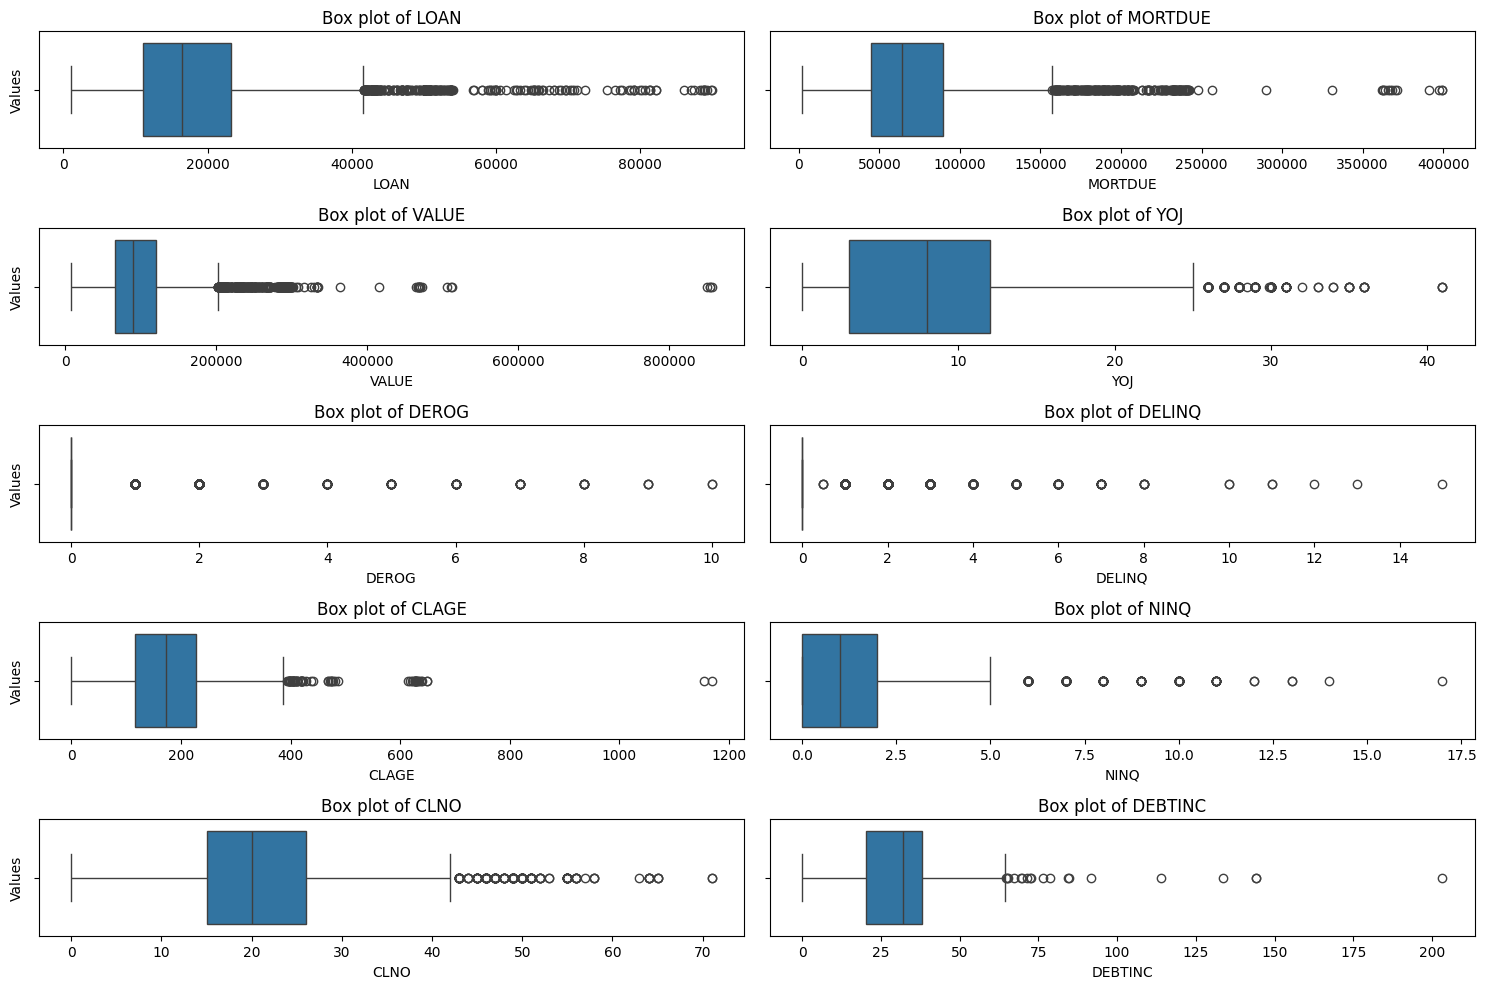

In [74]:
#First lets make df our new df_filtered dataset
df=df_filtered
# Selecting the numerical columns
numerical_columns = ['LOAN','MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO','DEBTINC']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 10), sharey=True)

for i, column in enumerate(numerical_columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Box plot of {column}')
    axes[row, col].set_ylabel('Values')

plt.tight_layout()
plt.show()


We can see a lot of outliers in all the variables, however we will choose to focus only on the variables that we believe their outliers could add noise to our models. Which are YOJ and CLNO
When constructing our decision tree models we will limit the effect of outliers by setting the min_samples_leaf_node to 2.

In [75]:
from scipy.stats import zscore
# Calculate z-scores for 'YOJ' and 'CLNO' columns
df['YOJ_zscore'] = zscore(df['YOJ'])
df['CLNO_zscore'] = zscore(df['CLNO'])

# Print the first 5 rows of the DataFrame with z-scores
print(df[['YOJ', 'YOJ_zscore', 'CLNO', 'CLNO_zscore']].head())

    YOJ  YOJ_zscore  CLNO  CLNO_zscore
0  10.5    0.232054   9.0    -1.220216
1   7.0   -0.250047  14.0    -0.719515
2   4.0   -0.663277  10.0    -1.120076
4   3.0   -0.801020  14.0    -0.719515
5   9.0    0.025439   8.0    -1.320357


In [76]:
# Set the z-score threshold for outlier detection
z_score_threshold = 3

# Replace outliers with capped values of the mean plus 3 standard deviations for 'YOJ'
mean_yoj = df['YOJ'].mean()
std_yoj = df['YOJ'].std()
df.loc[abs(df['YOJ_zscore']) > z_score_threshold, 'YOJ'] = mean_yoj + (z_score_threshold * std_yoj)

# Replace outliers with capped values of the mean plus 3 standard deviations for 'CLNO'
mean_clno = df['CLNO'].mean()
std_clno = df['CLNO'].std()
df.loc[abs(df['CLNO_zscore']) > z_score_threshold, 'CLNO'] = mean_clno + (z_score_threshold * std_clno)

# Recalculate z-scores
df['YOJ_zscore'] = (df['YOJ'] - mean_yoj) / std_yoj
df['CLNO_zscore'] = (df['CLNO'] - mean_clno) / std_clno

# Print the first few rows of the DataFrame with updated values
print(df[['YOJ', 'YOJ_zscore', 'CLNO', 'CLNO_zscore']].head())

    YOJ  YOJ_zscore  CLNO  CLNO_zscore
0  10.5    0.232034   9.0    -1.220114
1   7.0   -0.250026  14.0    -0.719454
2   4.0   -0.663221  10.0    -1.119982
4   3.0   -0.800952  14.0    -0.719454
5   9.0    0.025437   8.0    -1.320246


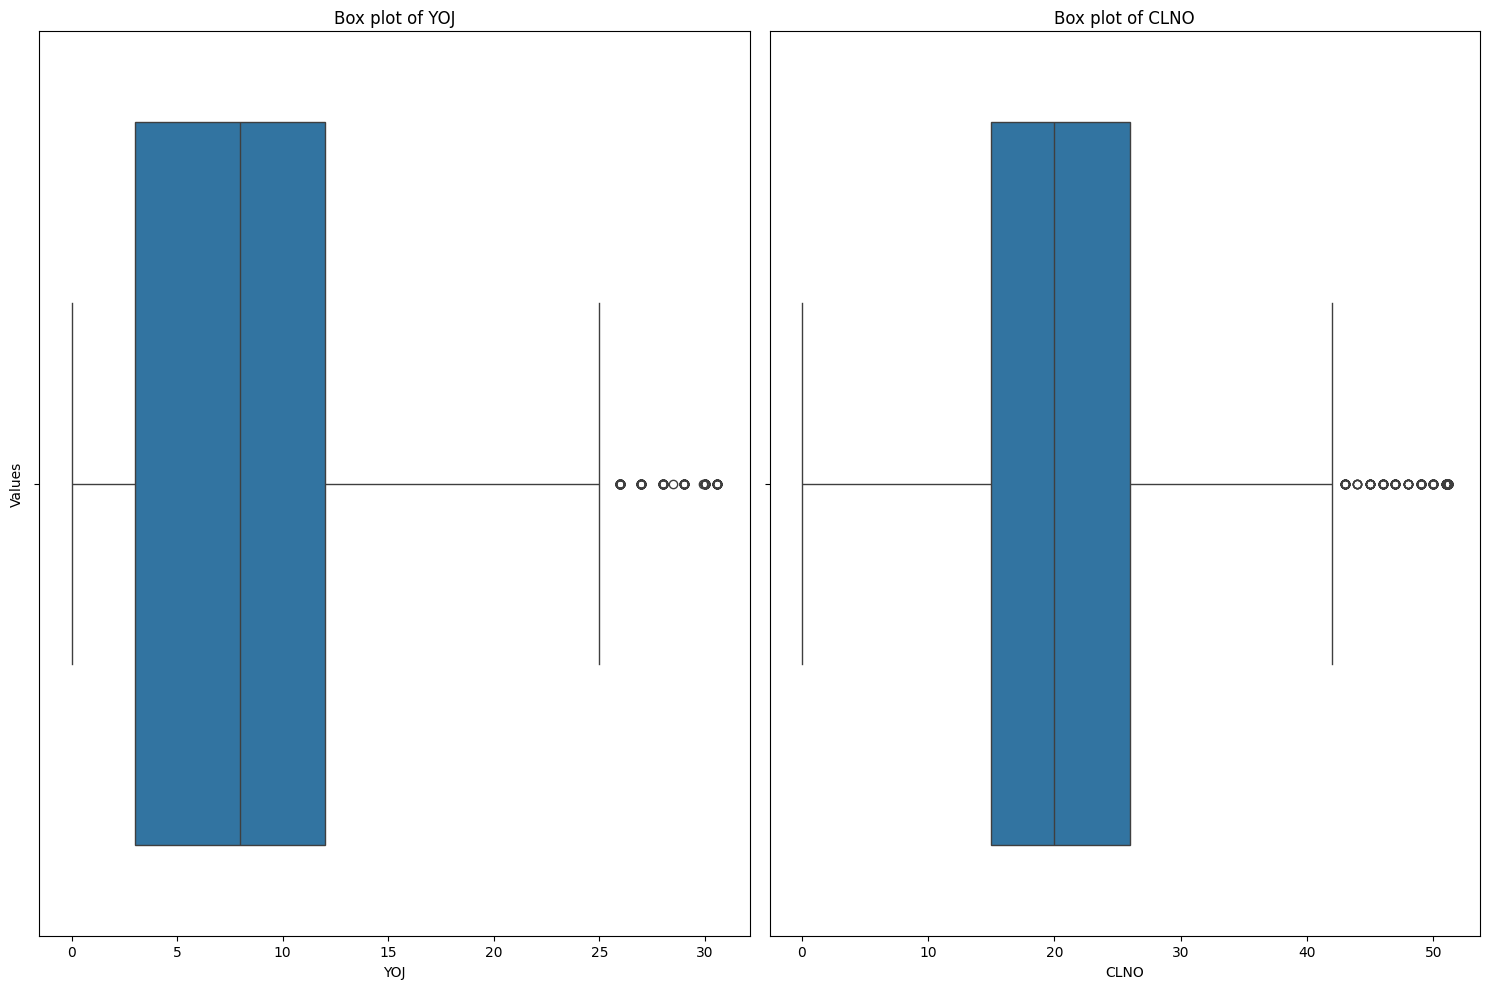

In [77]:
numerical_columns = ['YOJ', 'CLNO']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharey=True)

# Loop through numerical columns and create box plots
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box plot of {column}')
    axes[i].set_ylabel('Values')

# Adjust layout
plt.tight_layout()
plt.show()


## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

The most important insights learned from EDA were:


1.Financial stability of being at a certain job for longer gives people more security to take out a loan.

2.The proportion of loans taken out for debt consolidation is more than double than those for home improvement.

3.Both reasons to take out a loan have a similar default rate, debtcon has a 19% default rate vs 22% for home improvement.
However the average value of loans that ended up defaulting is about 50% higher for DebtCon than HomeImp, $18,998 vs $12,720.

4.All properties valued higher than 500,000 defaulted.

5.We also added the PERC_LOAN column to see the percentage of the loan vs the value of the propoerty.  The PERCLOAN ratio gets lower as the value of the property goes up, this could indicate a flaw in the banks loan approval process because, there are some lower loans that are almost the same as the value of the property. Generally you would want the loan value to be at about 20% of the value of the propoerty, in case the customer defaults and you have to go against the property to recover your money.

6.Property values between 50k and 500k have a default rate of about 16%, while over 500k are 100% and below 50k at 31%. The bank could pay special notice to these small loans and what security asset they have against defaults in this case.

7.For mortgage due the highest default rate is where the mortgage due is higher than 250k with over 43% default rate, followed by where mortgage due is lower than 50k at 24%.

9.We added a new column that compares the loan amount vs the mortgage due, the average ratio is 38% this tell us that most loans taken out are lower than the mortgage already due. However we can see that for the small mortgages due the percentage is higher, indicating that these could be second mortgages taken out or smaller loans for home improvement.

10.If either DEROG or DELINQ is larger than or equal to 5, there is a 100% chance of default. The more DELINQ  or DEROG, the more likely the default if they have one or the other, but as soon as you have a combination of both, the probability skyrockets.
This information can tell the bank to be extremely cautious to approve loans when customer have either of these bad reports.

11.With CLAGE which stands for age of the oldest credit line in months, we can see that  as expected the people who has older credit lines, on average older than 15 years, are most likely not to default. While very new credit lines (a year or lower) are more likely to default.

12.For NINQ which is number of recent credit inquiries, people who defaulted have a higher number, on average 1.75 recent inquiries, this tell us that the person is probably looking for credit but may be getting rejected elsewhere due to bad credit. So many recent credit inquiries could also be a tell that a customer may not pay back the loan.

13.In REASON, home improvements have a lower Mortgage due value in genereal. This makes sense as debt con is probably people who are looking to get lower interest rates for their mortgages.

14.For Debtcon  self employed people and people that work in sales have a much larger default ratio, this makes sense because these type of jobs have less financial stability than other types of jobs. This can help the bank immensely when filtering out potential loan candidates.

15.In both types of REASONS  Office and ProfExe jobs have the lowest default rate, but Office have lower mortgage due amounts that Profexe which makes sense because we assume Profexe have higher incomes. but still office jobs have stability and they pay off their loans, even if they are smaller.  

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

In [78]:
#Lets see what our data looks like now
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,YOJ_zscore,CLNO_zscore
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,0.028800,0.232034,-1.220114
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,0.034036,-0.250026,-0.719454
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,0.039272,-0.663221,-1.119982
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,0.044508,-0.800952,-0.719454
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0.025437,-1.320246


In [79]:
#Lets drop the z score columns and add the ratios of Mortgage and Value to Loan again
df = df.drop(columns=['YOJ_zscore', 'CLNO_zscore'])

# Create new column for 'LOAN' divided by 'MORTDUE'
df['LOAN/MORTDUE'] = df['LOAN'] / df['MORTDUE']

# Create new column for 'LOAN' divided by 'VALUE'
df['LOAN/VALUE'] = df['LOAN'] / df['VALUE']


In [80]:
# Visualize the DataFrame to verify the changes
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,LOAN/MORTDUE,LOAN/VALUE
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,0.028800,0.042537,0.028187
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,0.034036,0.018557,0.019006
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,0.039272,0.111111,0.089820
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,0.044508,0.017382,0.015179
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0.055650,0.042163


In [81]:
#We will get dummies for our categorical variables and drop the first
df= pd.get_dummies(df,drop_first=True)
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,LOAN/MORTDUE,LOAN/VALUE,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,0.028800,0.042537,0.028187,True,False,True,False,False,False
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,0.034036,0.018557,0.019006,True,False,True,False,False,False
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,0.039272,0.111111,0.089820,True,False,True,False,False,False
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,0.044508,0.017382,0.015179,True,True,False,False,False,False
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0.055650,0.042163,True,False,True,False,False,False


In [82]:
#Next we will scale our data using min max
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the specified columns and transform the data
df_scaled = df.copy()  # Create a copy of the original DataFrame
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])


In [83]:
#Visualize the first 5 rows to see changes
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,LOAN/MORTDUE,LOAN/VALUE,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,0.000000,0.059869,0.036590,0.343173,0.0,0.000000,0.080777,0.058824,0.175968,0.000000,0.042537,0.028187,True,False,True,False,False,False
1,1,0.002252,0.171050,0.071234,0.228782,0.0,0.133333,0.104289,0.000000,0.273729,0.000026,0.018557,0.019006,True,False,True,False,False,False
2,1,0.004505,0.028773,0.010261,0.130733,0.0,0.000000,0.127942,0.058824,0.195520,0.000052,0.111111,0.089820,True,False,True,False,False,False
4,0,0.006757,0.240856,0.122655,0.098049,0.0,0.000000,0.079893,0.000000,0.273729,0.000077,0.017382,0.015179,True,True,False,False,False,False
5,1,0.006757,0.071663,0.038117,0.294148,0.0,0.000000,0.086854,0.058824,0.156416,0.182429,0.055650,0.042163,True,False,True,False,False,False


In [84]:
#See the new shape
df_scaled.shape

(5952, 19)

In [85]:
# Set y variable
y = df_scaled['BAD']

# Extract the feature matrix (X) by excluding the 'BAD' column
X = df_scaled.drop(columns=['BAD'])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Get the coefficients
coefficients = log_reg.coef_[0]
intercept = log_reg.intercept_[0]

# Print coefficients
print("Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Coefficients:
LOAN: -0.18093390007393512
MORTDUE: -0.841157224701151
VALUE: 1.2517146085685342
YOJ: -0.6553854509672606
DEROG: 4.410278458809008
DELINQ: 7.959920924639632
CLAGE: -4.784202590821745
NINQ: 2.580704382056356
CLNO: 0.005696889587742045
DEBTINC: -8.65898324650021
LOAN/MORTDUE: -0.17110153198839267
LOAN/VALUE: -0.5945255718297533
REASON_HomeImp: 0.2863158424335375
JOB_Office: -0.5849416013476783
JOB_Other: 0.003558910706882695
JOB_ProfExe: -0.2569443267939154
JOB_Sales: 0.9119498702770934
JOB_Self: 0.40956625030899185

Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       941
           1       0.81      0.36      0.49       250

    accuracy                           0.85      1191
   macro avg       0.83      0.67      0.70      1191
weighted avg       0.84      0.85      0.82      1191



Our first logistic regression model shows a great score for people who didnt default, but we are more interested in the default loans, because that is what is costing the bank more money.
Lets graph the coefficients to see how the model is predicting.

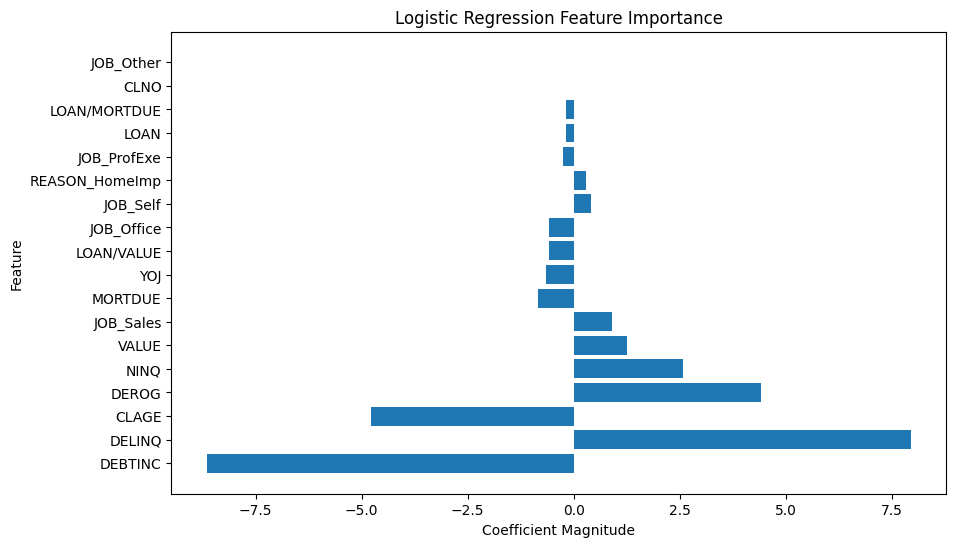

In [87]:
# Get absolute values of coefficients for feature importance
feature_importance = abs(coefficients)

# Sort feature importance in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Get sorted feature names
sorted_features = X.columns[sorted_idx]

# Get sorted coefficients
sorted_coefficients = coefficients[sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_coefficients)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Importance')
plt.show()

Next we will optimize our model using GridSearch

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],       # Regularization penalty
    'solver': ['liblinear', 'lbfgs']  # Solver algorithm
}

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Initialize GridSearchCV with the logistic regression model and parameter grid
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='recall')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       941
           1       0.74      0.48      0.59       250

    accuracy                           0.86      1191
   macro avg       0.81      0.72      0.75      1191
weighted avg       0.85      0.86      0.84      1191



This hypertuning improved the model significantly, next we will construct our decision tree

### Decision Tree

In [89]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

#Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.887489504617968
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       941
           1       0.76      0.68      0.72       250

    accuracy                           0.89      1191
   macro avg       0.84      0.81      0.82      1191
weighted avg       0.88      0.89      0.89      1191

Confusion Matrix:


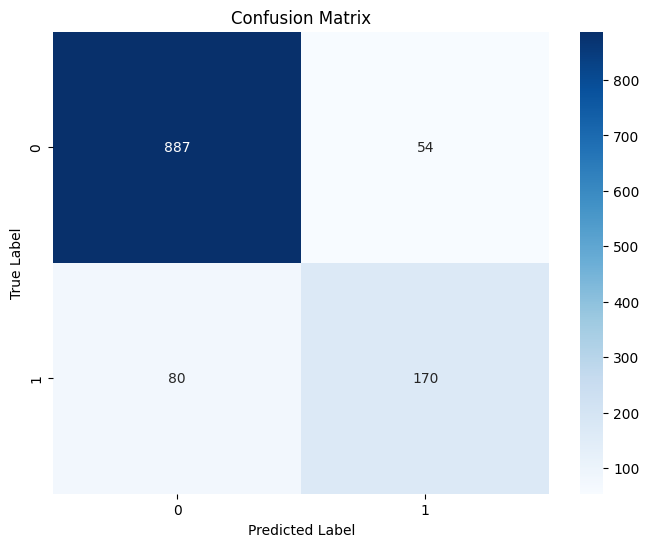

[[887  54]
 [ 80 170]]


In [90]:
#  Evaluate the model
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")


# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(conf_matrix)

The decision tree surpassed the logistic regression model for our 1 class. We want to keep minimizing the recall for that label, right now there are 80 missclasified defaults.

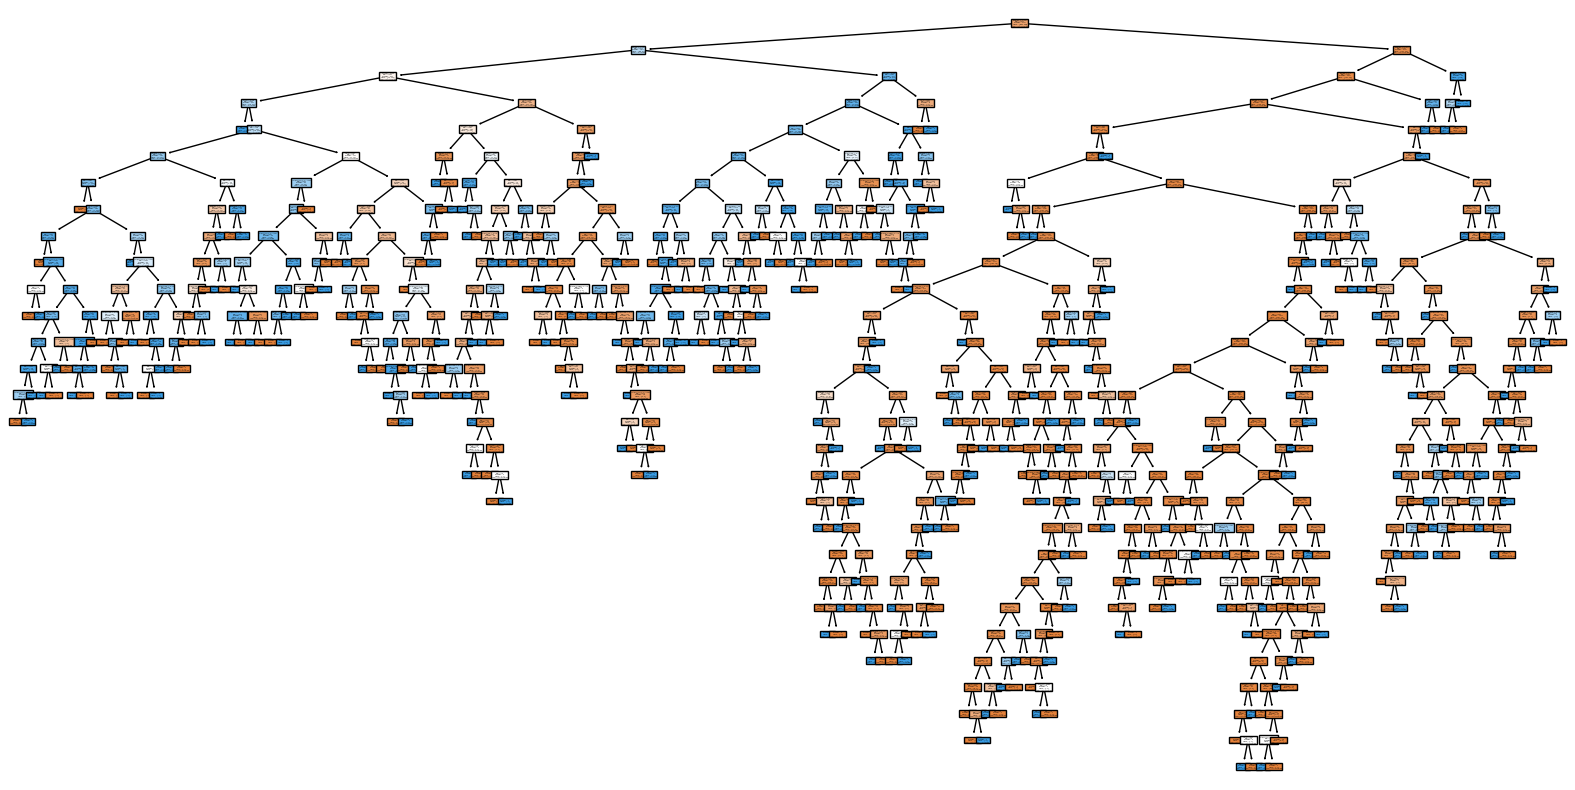

In [91]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20,10))  # Set the figure size
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Converted', 'Converted'])
plt.show()

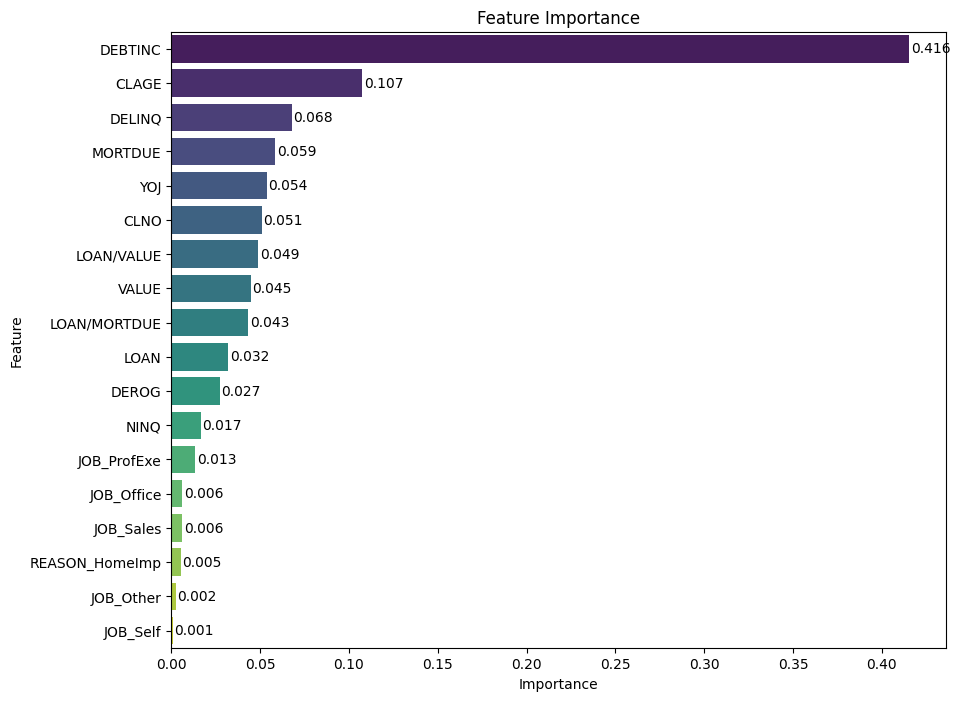

In [92]:
# Calculate feature importances
importances = clf.feature_importances_
columns = X.columns

# Create a DataFrame with importances
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Define a color palette with gradient
palette = sns.color_palette("viridis", len(importance_df))

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=importance_df.Importance, y=importance_df.index, palette=palette)

# Add numerical labels to the bars
for i, v in enumerate(importance_df.Importance):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center')

# Title and labels
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show plot
plt.show()

The tree is too large, we will prune it to understand it better. Right now DEBTINC seems to be the most important feature, the logistic regression model also considered it this way.

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 10}


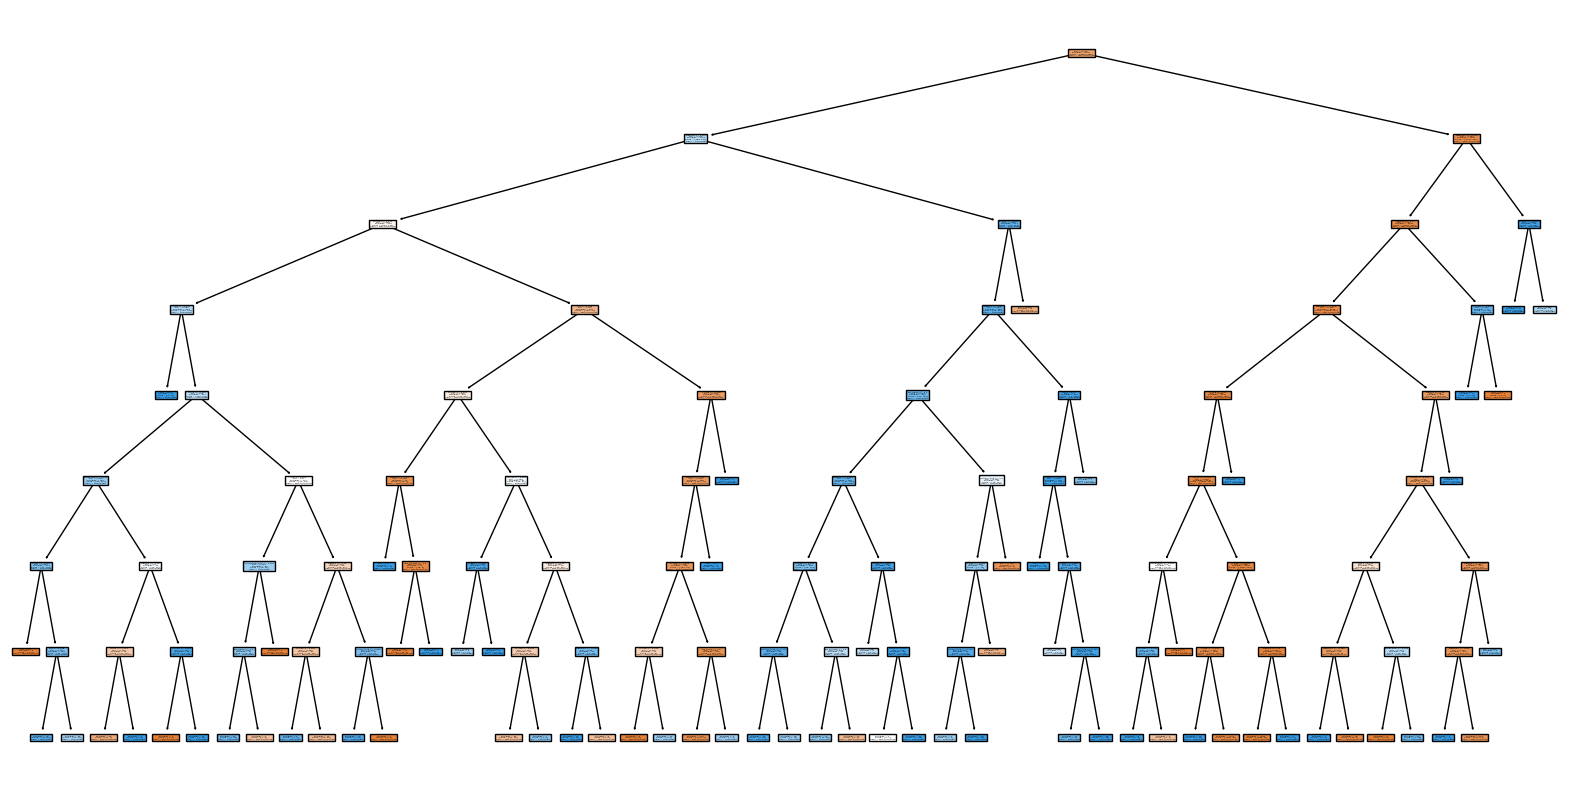

In [93]:
# Step 1: Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'], # Splitting criterion
    'max_depth': [2, 4, 6, 8],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] , # Minimum number of samples required to be at a leaf node
    'class_weight': [None, 'balanced', {0: 1, 1: 4}]
}

# Step 2: Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy'  # Evaluation metric
                          )

# Step 3: Fit the GridSearchCV object
grid_search.fit(X_train, y_train)

# Step 4: Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Step 5: Prune the tree with the best hyperparameters
pruned_tree = DecisionTreeClassifier(random_state=42, **best_params)
pruned_tree.fit(X_train, y_train)

# Step 6: Visualize the pruned tree
plt.figure(figsize=(20,10))
plot_tree(pruned_tree, filled=True, feature_names=X.columns, class_names=['Not Converted', 'Converted'])
plt.show()

Accuracy: 0.890848026868178
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       941
           1       0.81      0.63      0.71       250

    accuracy                           0.89      1191
   macro avg       0.86      0.80      0.82      1191
weighted avg       0.89      0.89      0.89      1191

Confusion Matrix:


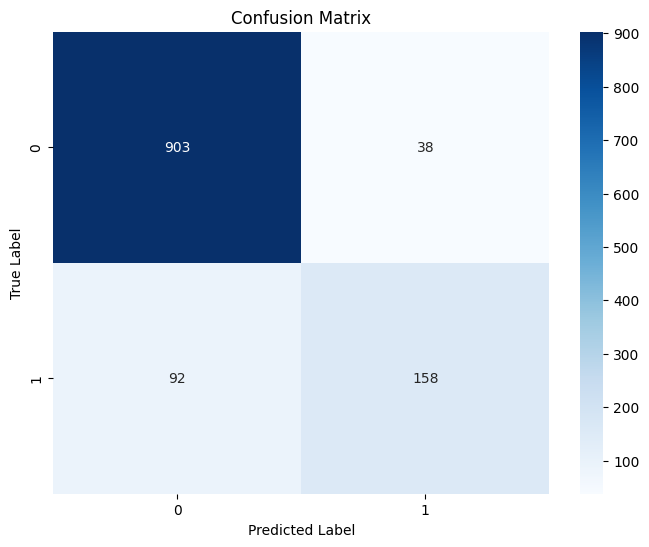

[[903  38]
 [ 92 158]]


In [94]:
# Step 5: Evaluate the model
y_pred = pruned_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")


# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(conf_matrix)

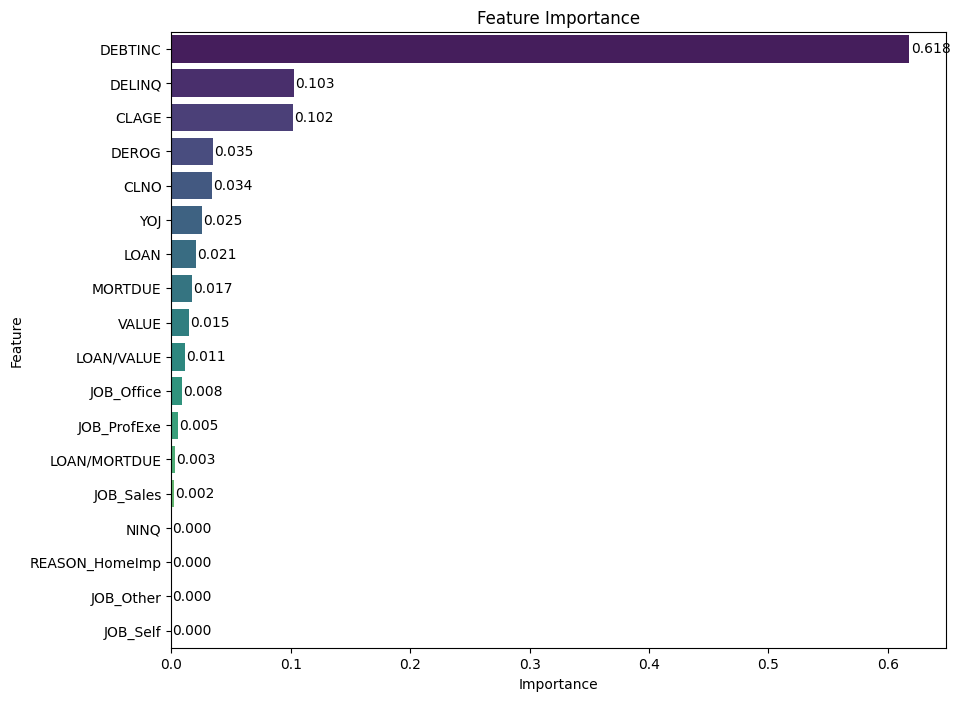

In [95]:
# Calculate feature importances
importances = pruned_tree.feature_importances_
columns = X.columns

# Create a DataFrame with importances
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Define a color palette with gradient
palette = sns.color_palette("viridis", len(importance_df))

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=importance_df.Importance, y=importance_df.index, palette=palette)

# Add numerical labels to the bars
for i, v in enumerate(importance_df.Importance):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center')

# Title and labels
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show plot
plt.show()

The overall accuracy improved slightly, however the F1 score for our default class is still low.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [96]:

#Create a Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

#Train the model
rf_clf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

Accuracy: 0.9185558354324097
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       941
           1       0.87      0.72      0.79       250

    accuracy                           0.92      1191
   macro avg       0.90      0.85      0.87      1191
weighted avg       0.92      0.92      0.92      1191

Confusion Matrix:


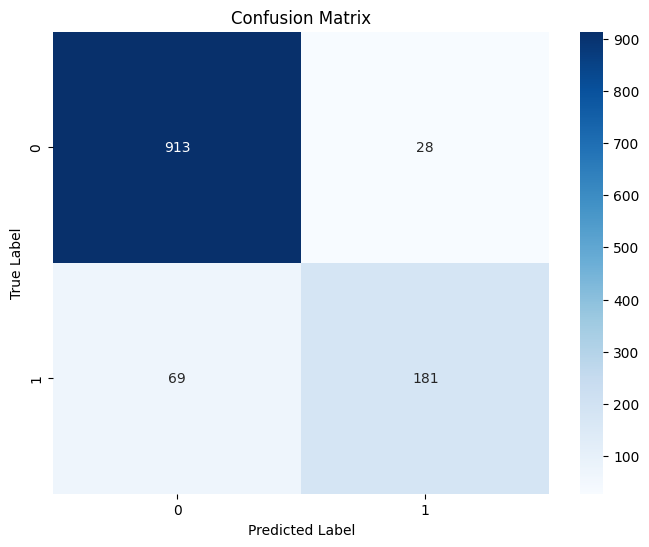

[[913  28]
 [ 69 181]]


In [97]:
# Evaluate the model
y_pred = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")


# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(conf_matrix)

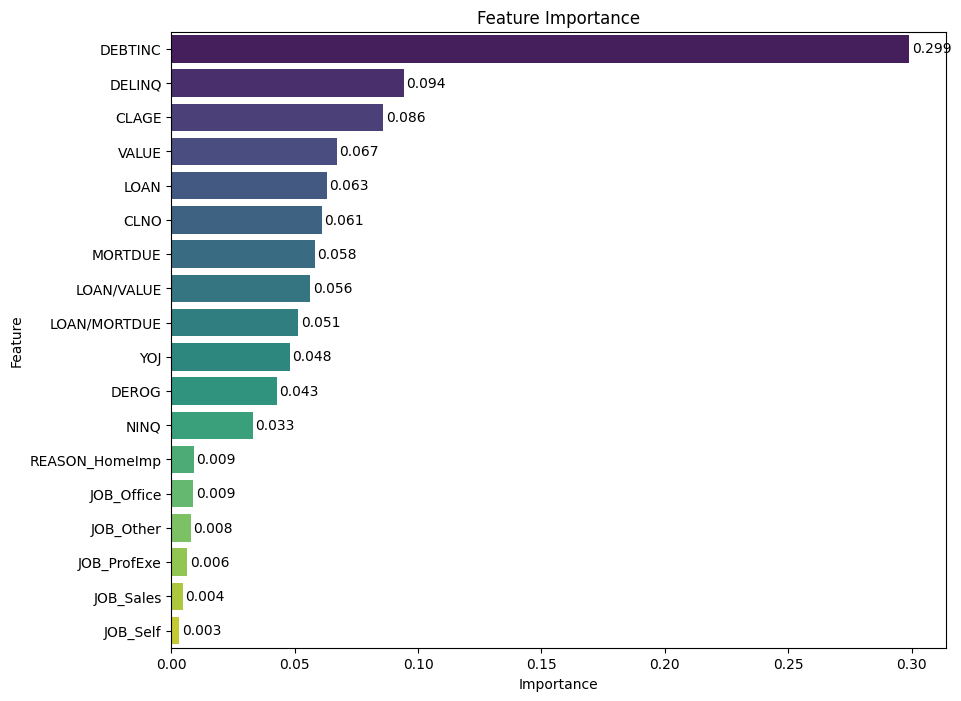

In [98]:
# Calculate feature importances
importances = rf_clf.feature_importances_
columns = X.columns

# Create a DataFrame with importances
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Define a color palette with gradient
palette = sns.color_palette("viridis", len(importance_df))

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=importance_df.Importance, y=importance_df.index, palette=palette)

# Add numerical labels to the bars
for i, v in enumerate(importance_df.Importance):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center')

# Title and labels
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show plot
plt.show()

The random forest is performing the best so far. Recall score of  .72 is the number to beat now

### **Random Forest Classifier Hyperparameter Tuning**

In [99]:
# Step 1: Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'class_weight': [None, 'balanced', {0: 1, 1: 4}] ,
    'criterion': ['gini', 'entropy']
}

# Step 2: Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # 3-fold cross-validation
                           scoring='recall',  # Evaluation metric
                           n_jobs=-1  # Use all available cores
                          )
# Step 3: Fit the GridSearchCV object
grid_search.fit(X_train, y_train)

# Step 4: Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Step 5: Train a new Random Forest classifier with the best hyperparameters
best_rf_clf = RandomForestClassifier(random_state=42, **best_params)
best_rf_clf.fit(X_train, y_train)



Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=2,
                       n_estimators=200, random_state=42)

Accuracy: 0.8690176322418136
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       941
           1       0.65      0.82      0.72       250

    accuracy                           0.87      1191
   macro avg       0.80      0.85      0.82      1191
weighted avg       0.89      0.87      0.87      1191

Confusion Matrix:


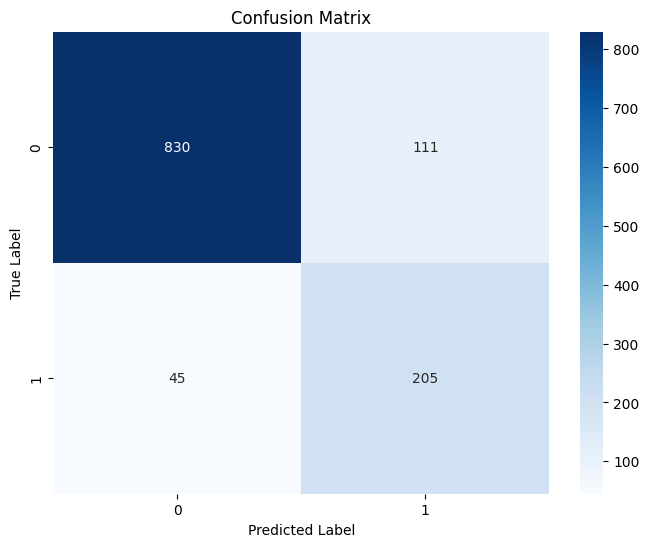

[[830 111]
 [ 45 205]]


In [100]:
# Evaluate the model
y_pred = best_rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")


# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(conf_matrix)

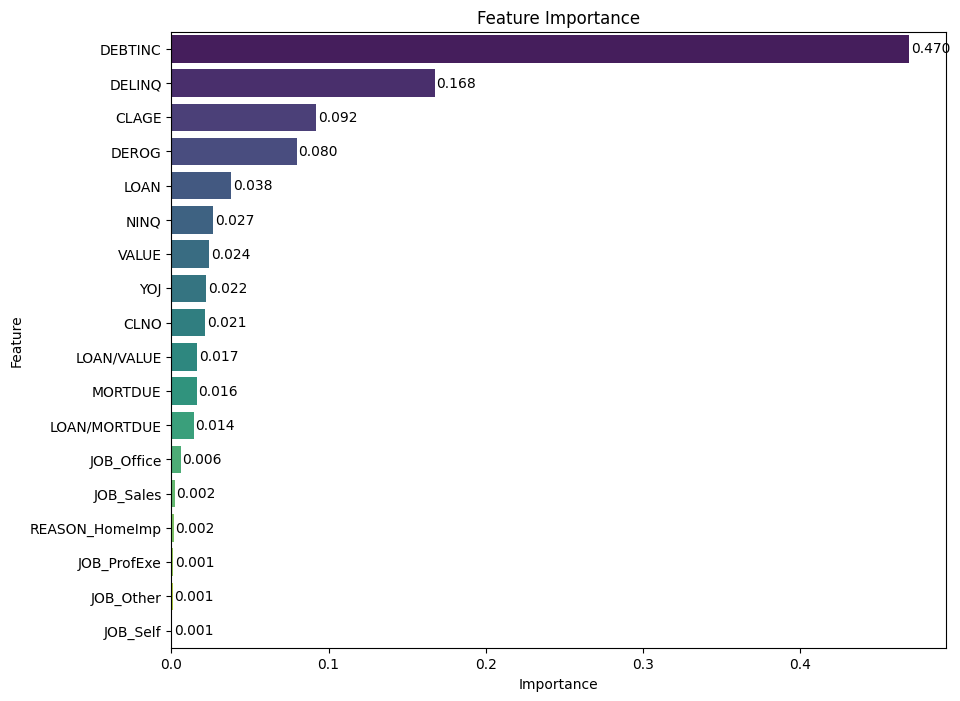

In [101]:
# Calculate feature importances
importances = best_rf_clf.feature_importances_
columns = X.columns

# Create a DataFrame with importances
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Define a color palette with gradient
palette = sns.color_palette("viridis", len(importance_df))

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=importance_df.Importance, y=importance_df.index, palette=palette)

# Add numerical labels to the bars
for i, v in enumerate(importance_df.Importance):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center')

# Title and labels
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show plot
plt.show()

We were able to get the recall for the 1 class to 82, so this is a big improvement for our purposes. Although our F1 score is lower, this makes sense because we set our scoring to recall.

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       941
           1       0.86      0.74      0.79       250

    accuracy                           0.92      1191
   macro avg       0.89      0.85      0.87      1191
weighted avg       0.92      0.92      0.92      1191

Confusion Matrix:
[[910  31]
 [ 66 184]]


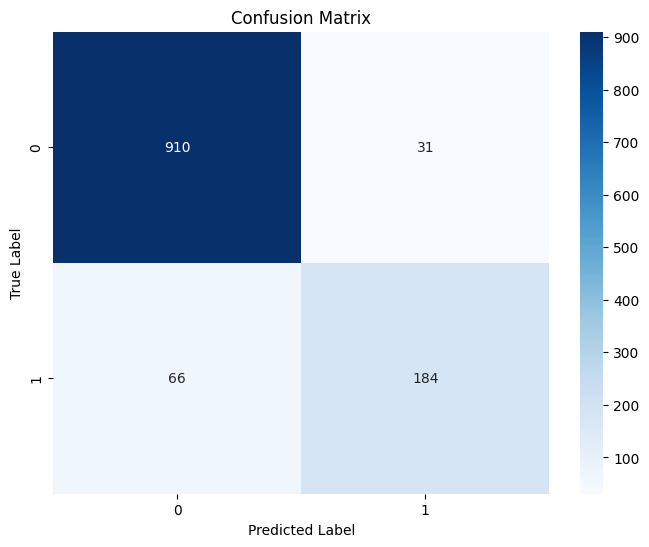

In [102]:
import xgboost as xgb

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(max_depth=6, learning_rate=0.1, n_estimators=100, objective='binary:logistic', eval_metric='logloss', random_state=42)

# Train the model on the training data
xgb_classifier.fit(X_train, y_train)

# Predict the target labels on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=xgb_classifier.classes_, yticklabels=xgb_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

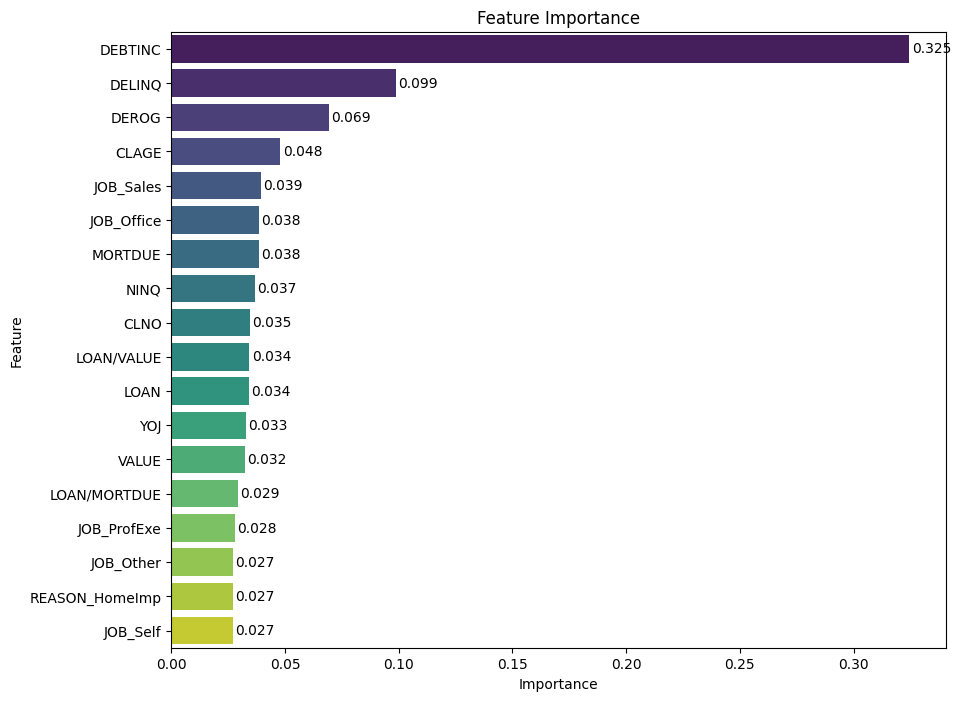

In [103]:
# Calculate feature importances
importances = xgb_classifier.feature_importances_
columns = X.columns

# Create a DataFrame with importances
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Define a color palette with gradient
palette = sns.color_palette("viridis", len(importance_df))

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=importance_df.Importance, y=importance_df.index, palette=palette)

# Add numerical labels to the bars
for i, v in enumerate(importance_df.Importance):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center')

# Title and labels
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show plot
plt.show()

The XG Boost is performing slightly better than our first random forest, we will hypertune it to improve it for the 1 class. DEBTINC is still the most important feature, followed by DELINQ

Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 150, 'scale_pos_weight': 3, 'subsample': 0.8}
Best Recall Score: 0.7835633925889517
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       941
           1       0.75      0.84      0.79       250

    accuracy                           0.91      1191
   macro avg       0.85      0.88      0.87      1191
weighted avg       0.91      0.91      0.91      1191

Confusion Matrix:
[[869  72]
 [ 39 211]]


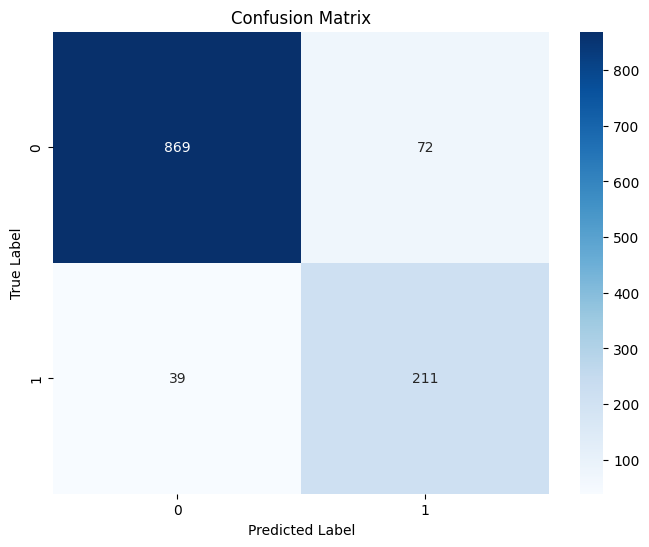

In [104]:

# Define the parameter grid including scale_pos_weight
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3]
}

# Instantiate the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

# Instantiate GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='recall', n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best recall score
best_params = grid_search.best_params_
best_recall_score = grid_search.best_score_

# Print the best parameters and the best recall score
print("Best Parameters:", best_params)
print("Best Recall Score:", best_recall_score)

# Predict the target labels on the test data using the best model
best_xgb_classifier = grid_search.best_estimator_
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate the best model
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=best_xgb_classifier.classes_, yticklabels=best_xgb_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


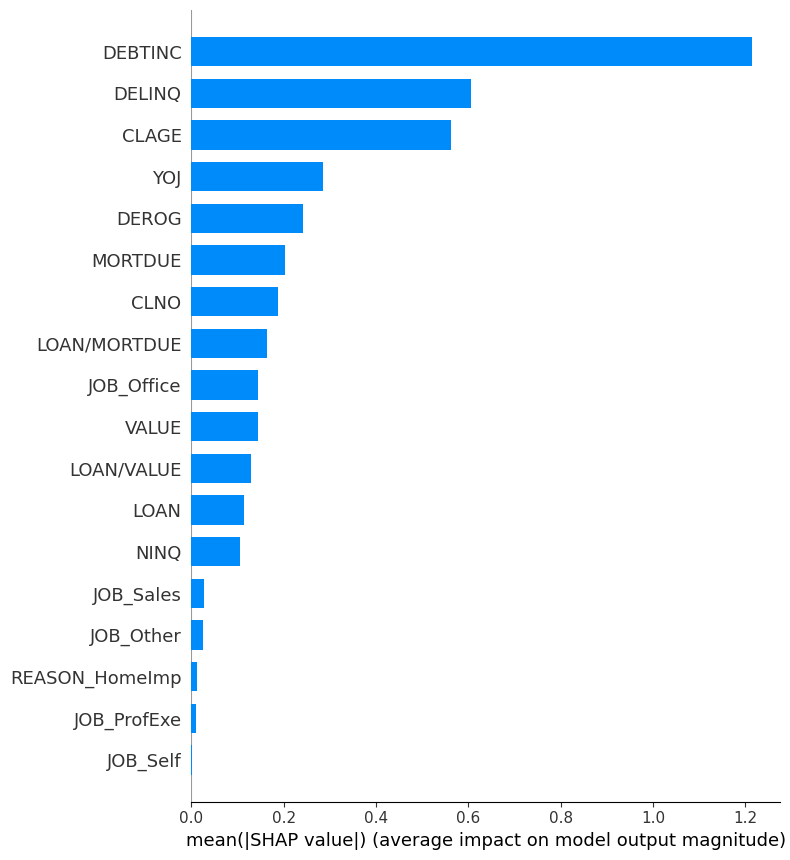

In [105]:
import shap

# Create a TreeExplainer object
explainer = shap.TreeExplainer(best_xgb_classifier)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


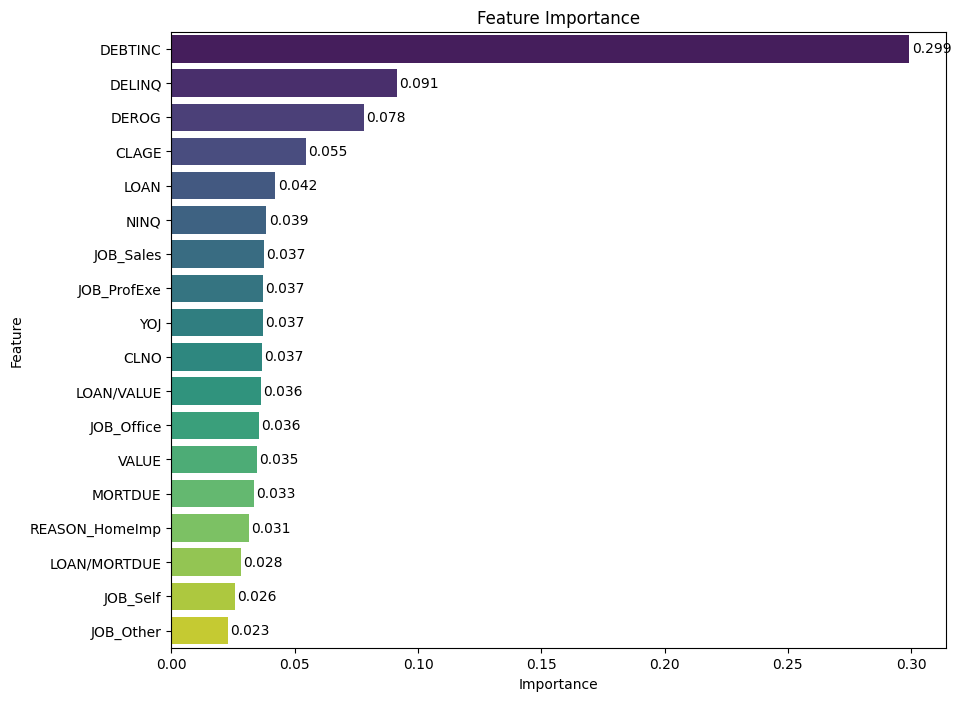

In [106]:
# Calculate feature importances
importances = best_xgb_classifier.feature_importances_
columns = X.columns

# Create a DataFrame with importances
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Define a color palette with gradient
palette = sns.color_palette("viridis", len(importance_df))

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=importance_df.Importance, y=importance_df.index, palette=palette)

# Add numerical labels to the bars
for i, v in enumerate(importance_df.Importance):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center')

# Title and labels
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show plot
plt.show()

We can see the model is not overfitting because recall is very similar for both training and test datasets.

In [108]:
#import libraries again
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)  # Predict using the independent variables
    accuracy = accuracy_score(target, pred)  # Accuracy
    precision = precision_score(target, pred)  # Precision
    recall_class1 = recall_score(target, pred, pos_label=1)  # Recall for positive class: 1
    f1 = f1_score(target, pred)  # F1-score
    cm = confusion_matrix(target, pred)  # Confusion Matrix

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall (Class 1)": recall_class1,
            "F1-Score": f1,
            "Confusion Matrix": [cm],
        },
        index=[0],
    )

    return df_perf

# Storing test results for each model in different variables
models = [log_reg, best_model,
    clf, pruned_tree, rf_clf, best_rf_clf, xgb_classifier, best_xgb_classifier
]

models_names = [
    "Logistic Regression", "Best Logistic Regression","Decision tree", "Pruned tree", "Random Forest", "Best Random Forest",
    "XGBoost", "Best XGBoost"
]

# Fit all models with training data before evaluating on test set
for model in models:
    model.fit(X_train, y_train)

test_results = {}
for model, model_name in zip(models, models_names):
    test_results[model_name] = model_performance_classification(model, X_test, y_test)

# Creating DataFrame for the result summary
models_test_comp_df = pd.concat(test_results.values(), keys=test_results.keys(), axis=0)

print("Test performance comparison:")
print(models_test_comp_df)


Test performance comparison:
                            Accuracy  Precision  Recall (Class 1)  F1-Score  \
Logistic Regression      0  0.847187   0.809091             0.356  0.494444   
Best Logistic Regression 0  0.856423   0.742331             0.484  0.585956   
Decision tree            0  0.887490   0.758929             0.680  0.717300   
Pruned tree              0  0.890848   0.806122             0.632  0.708520   
Random Forest            0  0.918556   0.866029             0.724  0.788671   
Best Random Forest       0  0.869018   0.648734             0.820  0.724382   
XGBoost                  0  0.930311   0.871111             0.784  0.825263   
Best XGBoost             0  0.906801   0.745583             0.844  0.791745   

                                   Confusion Matrix  
Logistic Regression      0   [[920, 21], [161, 89]]  
Best Logistic Regression 0  [[899, 42], [129, 121]]  
Decision tree            0   [[887, 54], [80, 170]]  
Pruned tree              0   [[903, 38], [9

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

Logistic Regression: Offered a simple and very interpretable model, however even after fine-tuning the recall score for our defaults was very low
Decision Tree: Performed a lot better than logistic regression, when pruning the tree, the results are still interpretable and when hypertuning it, Gini impurity made it less sensitive to outliers.
Random Forest: The base random forest model substantially beat the pruned decision tree. when hypertuning, min_samples_leaf increased to 2 also number of estimators increased from 100 to 200. With these changes the model was able to more accurately predict our default class with a recall of .82.
XGBoost (Extreme Gradient Boosting): The original XG-Boost outperformed all other base models, but still not better than the tuned random forest. However the tuned XGBoost proved superior with a recall for .84 for our default class. When setting the scale_pos_weight to 3 it  increased the penalty for misclassifying the default class, which proved very useful in our imbalanced datasets.

Potential Improvements for XGBoost:
Feature Engineering: We could conduct more feature engineering to identify and select better features to better capture the underlying patterns related to loan default.
We could also implement other techniques like early stopping, which stops training when the model's performance on a validation set starts to degrade, preventing overfitting and improving efficiency.


**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

Job Stability and Loan Security: Longer job years provides individuals with financial stability, increasing their confidence in taking out loans.

Loan Purpose Insights: Debt consolidation loans are twice as common as home improvement loans.

Similar Default Rates, Different Loan Values: Although both loan reasons have similar default rates, the average defaulted loan value for debt consolidation is significantly higher than that for home improvement.

Property Value Default Trend: Properties valued over $500,000 experienced a 100% default rate, indicating a potential risk factor for high-value properties.

Loan-to-Value Ratio Analysis: The loan-to-value ratio decreases as property value increases, highlighting potential flaws in loan approval processes, especially for lower loan amounts.

Property Value and Default Rates: Properties valued between $50,000 and $500,000 exhibit a default rate of approximately 16%, while those above $500,000 have a 100% default rate, suggesting a need for closer examination of higher loan segments.

Mortgage Due and Default Risk: Mortgages exceeding $250,000 and those below $50,000 have high default rates, emphasizing the importance of considering mortgage due amounts in risk assessment.

Derogatory Reports and Default Probability: Customers with a DEROG or DELINQ score of 5 or higher have a 100% default probability, with higher scores indicating increased default risk. This was confirmed during the feature importance for our models.

Credit Line Age and Default Likelihood: Older credit lines (>15 years) correlate with lower default rates, while newer lines (≤1 year) have higher default probabilities.This was also confirmed during the feature importance for our models.

Recent Credit Inquiries and Default Risk: A higher number of recent credit inquiries (~1.75) suggests potential financial instability and a higher likelihood of loan default.

Impact of Job Type on Default Rates: Self-employed individuals and sales professionals applying for debt consolidation loans exhibit higher default ratios, emphasizing the role of job stability in loan repayment.

Default Rate Variation by Occupation: Office jobs have the lowest default rates, indicating greater financial stability despite lower mortgage due amounts compared to professional/executive roles.

Significance of Debt-to-Income Ratio (DEBTINC): Throughout all models, DEBTINC emerges as a critical feature, reflecting borrowers' ability to manage monthly payments and serving as a key determinant in loan approval processes.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

I suggest the hypertuned XGBoost to be adopted for classifying and approving customers. Although the interpretability of this model is not the best (the pruned decision tree would be more explainable),  in this case, prediciting customers that will default is the main objective for the bank, that is why we consistently used the recall for the 1 class as our scoring measure. This model has a recall of .84. Meaning that it will clasiify the defaulters correctly 84% of the time. Assuming that this dataset contains all customers the bank has had, previously they had a 80% correct choosing. Because they wouldnt authorize loans to people they thought would default, so this model captures 4% more defaulters than there previous rules. With an average loan of $18,607. This model could save the company $720,000 for each 1000 customers.
We suggest to deploy this model and have the loan approvals to use it in real time when analyzing potential customers. Also they can use all the insights from EDA for their pre-screening processes. We believe that with this combination the bank will reduce their default rate even more. The more data that comes in will be used to keep training and evaluating the models. Perhaps in the future more information could be captured from the customers to improve model performance.

### ***Final Report***

> Following is the final report



### **Executive Summary**

The goal of this project was to develop a machine learning model that would address the problem of the high amounts of loan defaults that are digging into the banks profits.


To address this issue, we recommend deploying a hypertuned XGBoost model for classifying and approving loan applications. The model will serve the loan analysts and help create an ideal customer persona. Along with the interpretability that we gather from the models feature selection, , its high recall of 84% prioritizes accurately identifying potential defaulters, thus limiting the number of defaults.

#Improved Default Detection:

The provided dataset had a balance of 20% defaults and 80% loans that were payed back. Compared to the bank's previous approach, this model can correctly identify 4% more defaulters, translating to significant cost savings. With an average loan size of $18,607, the model could potentially help save the company over $720,000 per 1,000 customers, by reducing the number of bad loans approved.

#Actionable Insights:

Additionally, the insights from the Exploratory Data Analysis (EDA) can be integrated with the model's predictions to further refine the bank's pre-screening processes for loan applications.

The SHAP analysis performed on our Tuned-XGBoost model considered features such as DEROG (Number of Major Derogatory Reports), DELINQ (Number of Delinquent Credit Lines), CLAGE (Age of the Oldest Credit Line), and DEBTINC (Debt-to-Income Ratio) as the most important for loan default classification due to their significant impact on assessing an individual's financial health and creditworthiness. DEROG and DELINQ signify instances of serious delinquencies and late payments, indicating a history of financial difficulties and therefore a higher risk of default. CLAGE reflects the length of a borrower's credit history, with longer histories typically associated with greater stability and lower default risk. Meanwhile, DEBTINC measures the proportion of income allocated to debt payments, offering insights into a borrower's capacity to manage additional debt and meet future obligations. Collectively, these features provide crucial information for evaluating credit risk, making them key determinants in predicting loan default likelihood within the XGBoost model. Bank personnel should become very familiarized with these features, so they can spot them when reviewing customers information.

#See Figure 1 Appendix


##Next Steps:

#Model Deployment:

The first step, would be to integrate the XGBoost model into the loan approval process for real-time analysis of potential borrowers.

#Continuous Improvement:

Following this, we would advise the bank to utilize all the new data coming in from approved customers to retrain and evaluate the model for ongoing performance enhancement. The banks issue should be considered as a living phenomena, as such it is subject to change. People change their financial habits, lifestyle, etc... What the model considered important today to classify a potential default, might not necesarily be true in the future. That is why it is important for the model to be constantly trained and evaluated, in order to keep up with changing times.

##Data Acquisition:

It would we wise to explore the possibility of capturing additional customer information to potentially improve model accuracy in future iterations. For example the loan approvals might notice some interesting patterns in default customers that the bank is not yet quantifying numerically. The industry knowledge and experience that they posses can be of great value when considering other features to analyze. The idea is that one of these features would have greater predictory power than our current ones.

By implementing these recommendations, the bank can significantly reduce its default rate and strengthen its financial position. Continuous data-driven evaluation and improvement of the model will further optimize its effectiveness over time.


### Problem Summary

The bank earns it's revenue through the interest payments of customers loan throughout time. When the loan is payed off the customer will have payed back the original loan plus interest. But when a customer is unable or unwilling to pay back the loan, the bank loses money because the whole default process costs money. From legal fees, to administrative costs, the bank has to go through a long and costly money to get the customer to either pay back the loan or acquire the guarantee the customer left on the loan.

### Solution Design

Our extensive Exploratory Data Analysis (EDA) gave us a good idea of what to expect as the most important variables for model training. Several classifier models were evaluated during this process. Ranging from logistic regression models, to decision trees and random forests. They all showcased a similar ranking of feature importance, only changing the order and importance of the top features throughout all. Only the hyper-tuned random forest and XGBoost models we able to exceed our 80% Re-call for class 1.

 In the end, the tuned XGBoost model identified the most important features that help identify customers that will not pay back their loan therefore had the best recall score out of all the models.

# See figure 2 Appendix




The XGBoost model may have outperformed the Random Forest due to its unique ability to handle complex relationships and nonlinearities in data more effectively. As we saw from our EDA, there was not always a linearity or observable correlationship between the features. By utilizing its gradient boosting, which builds decision trees sequentially, learning from the errors of previous trees, the model was able to pick up better on what led to a default in most cases.  
Whereas the Random Forest build the trees independently. The sequential learning process  XGBoost followed, allowed it to focus more on the misclassified instances, improving our re-call. Additionally, the fine-tuning of our XGBoost improved regularization, and helped reduce overfitting allowing to better generalize on the data.

 In order for the model to be utilized it has to be deployed for the end users. In this case, the people that are in charge of approving loans would fill the customers information (loan amount, debtinc ratio, delinq,etc...) in an app or webpage and the model would give its prediction. If the model predicts a default, the loan should be rejected and vice-versa. This is a valid solution to the banks problem because the model was created from their data, meaning that it accurately reflects the behavioral patterns of their client base.

### Recommendations for implementation

To implement the model correctly, stakeholders will have to streamline their data capturing process. This means when a user fill out the bank approval form, the information is automatically transfered to a central datalake where the model can make predictions for each customer. If the loan is approved, once the customer pays back or defaults on the loan, then that new customer has to be used for re-training the model. Also it is advised that the bank should include more questions to gather more features on the customers to try and find variables that can help improve our models recall. For example, the bank could try to add features that are similar to the current most important ones, like late credit card payments or get more information on spouse and if the customer has children.

There are several benefits associated with this solutions. For starters,
this model captures 4% more defaulters than there previous rules. With an average loan value of  18,607. This model could help save the company 720,000 for each 1000 customers. Additionaly this solution will lead to faster loan approvals, thus increasing the number of customers. Another side-effect would be that with less amounts fo defaults, the bank will have freed up more capital which in turn allows it to provide more loans to customers. So this solution works like a healthy cycle in which the bank has more money to lend, faster to lend money and at the end receives more interest payments.

Risks and Challenges:

There are some potential risks and challenges with this solution. The first being that users will have to be trained on how to use and understand the models workings. This can sometimes be challenging if it disrupts the old way of doing things. Some people might be more accustomed to old ways or going with their intuition in some cases.

Secondly, the model will have to be constantly trained and evaluated again. But the process to gather new data will take a long time. This is because a customer can't be added to the training data until he/she either pays back the loan or defaults. These two things can take years to happen, thus limiting the speed at which we can gather new data.

Some other associated problems that came up during our EDA was the fact that there are some negligent practices the bank is performing and protocols should be put in place to address this.  
We discovered that the loan-to-value ratio decreases as property value increases, highlighting potential flaws in loan approval processes. Low valued properties get a higher percetentage of loan approved than higher valued ones. This is counter-intuitive because the bank has less of a guarantee to go against defaults.This is dangerous because if these lower valued properties default, the bank will have less chance of recovering its money. It would be wise to establish a protocals and numbers for this.  An example could be of maximum 30% of the property value would be the loan amount approved. Currently this number follows no notable patterns.

Another issue was that we found that properties valued over $500,000 experienced a 100% default rate, The bank could put policies in place to not approve loans for these properties automatically.

Conclusion

With the adoption and use of the model, alongside with the best practices suggested, the bank will start better understanding who their ideal customer is and focus on growing and nurturing these types of clients. As mentoned before, it is important for everyone at the bank to understand that this is a live and never-ending process and thus will require to keep updating and improving their database. Their customer database should be widely viewed as one of the banks greatest assets, because only through the analysis and interpretation of the data, can the bank continue to grow their profits year after year.



Appendix


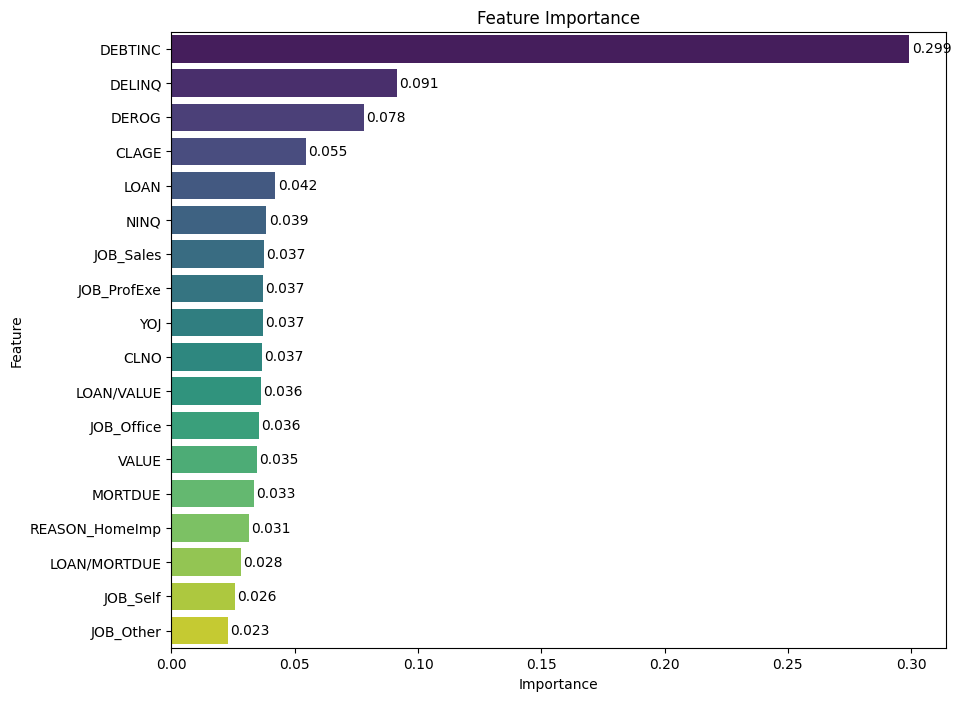

In [112]:
##Figure 1
# Calculate feature importances
importances = best_xgb_classifier.feature_importances_
columns = X.columns

# Create a DataFrame with importances
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Define a color palette with gradient
palette = sns.color_palette("viridis", len(importance_df))

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=importance_df.Importance, y=importance_df.index, palette=palette)

# Add numerical labels to the bars
for i, v in enumerate(importance_df.Importance):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center')

# Title and labels
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show plot
plt.show()

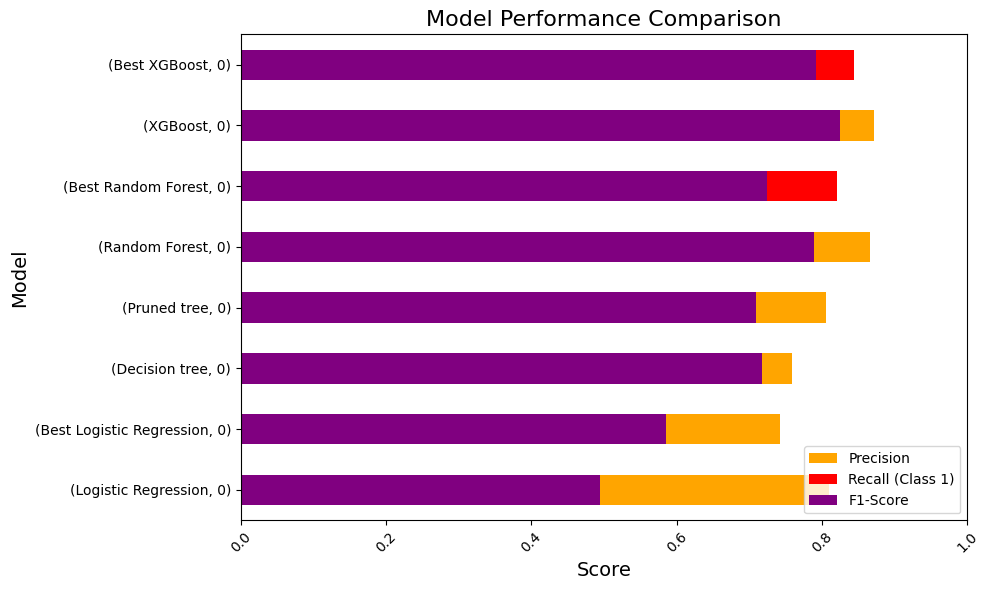

In [113]:
##Figure 2
# Transpose the DataFrame for easier plotting of model performances
models_test_comp_df = models_test_comp_df.T

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a horizontal bar plot
models_test_comp_df['Precision'].plot(kind='barh', ax=ax, color='orange', label='Precision')
models_test_comp_df['Recall (Class 1)'].plot(kind='barh', ax=ax, color='red', label='Recall (Class 1)')
models_test_comp_df['F1-Score'].plot(kind='barh', ax=ax, color='purple', label='F1-Score')

# Set the x-axis limit from 0 to 1
ax.set_xlim(0, 1)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
ax.legend(loc='lower right')

# Add title and axis labels
ax.set_title('Model Performance Comparison', fontsize=16)
ax.set_xlabel('Score', fontsize=14)
ax.set_ylabel('Model', fontsize=14)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()